# 인공지능기초 기말과제
- 본 과제에서는 딥러닝 기반 객체 인식 기술인 YOLO (You Only Look Once) 를 이용하여 사람들이 마스크를 제대로 착용했는지를 자동으로 분석하는 시스템을 구축함.
- 제출자: 202020892 박경민
- 개발환경: VScode
- version: Python 3.9.1

# 목차
1. 데이터 준비<br>
    1-1. 필요한 라이브러리 및 YOLOv5 설치<br>
    1-2. 데이터 압축 풀기<br>
    1-3. 데이터셋 분할(6:2:2)<br>
    1-4. 데이터셋 구성 파일 (data.yaml) 생성<br>
    
2. 모델 훈련 및 평가<br>
    2-1. YOLO 모델 훈련<br>
    2-2. 훈련 결과 시각화<br>
    2-3. 성능 평가 및 시각화<br>
    2-4. 객체 인식 및 시각화<br>

3. 하이퍼파라미터 튜닝 및 평가<br>
    3-1. YOLO 하이퍼파라미터 튜닝<br>
    3-2. 하이퍼파라미터 튜닝 모델 평가 결과 저장<br>
    3-3. 하이퍼파라미터 튜닝 모델 훈련 결과 시각화<br>
    3-4. 하이퍼파라미터 튜닝 모델 성능 평가 및 시각화<br>
    3-5. 하이퍼파라미터 튜닝 모델 객체 인식 및 시각화<br>

4. 최종 모델 학습 및 분석<br>
    4-1. 최종 모델 학습<br>
    4-2. 최종 모델 테스트 데이터셋 평가<br>
    4-3. 최종 모델 성능 평가 및 시각화

# 1. 데이터 준비
1-1. 필요한 라이브러리 및 YOLOv5 설치

In [2]:
# 1. YOLOv5 레포지토리 클론
!git clone https://github.com/ultralytics/yolov5.git

# 2. yolov5 디렉토리 이동
%cd yolov5

# 2. 요구사항 설치
!pip install -r requirements.txt
!pip install scikit-learn

c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\yolov5


C:\Users\박경민\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


You should consider upgrading via the 'c:\users\박경민\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\박경민\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


1-2. 데이터 압축 풀기

In [3]:
import os
import zipfile

# 현재 작업 디렉토리 확인
current_dir = os.getcwd()
print(f"현재 작업 디렉토리: {current_dir}")

# 데이터 압축 해제
zip_file = os.path.join(current_dir, '..', 'face_mask.zip')
data_dir = os.path.join(current_dir, '..', 'face_mask')

# face_mask.zip 압축 해제
if os.path.exists(zip_file):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(data_dir)
    print(f"{zip_file} 압축 해제 완료.")
else:
    print(f"{zip_file} 파일을 찾을 수 없습니다.")

# 압축 해제된 파일(face_mask) 확인
for root, dirs, files in os.walk(data_dir):
    for file in files:
        print(os.path.join(root, file))

현재 작업 디렉토리: c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\yolov5
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\yolov5\..\face_mask.zip 압축 해제 완료.
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\yolov5\..\face_mask\face_mask\maksssksksss0.png
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\yolov5\..\face_mask\face_mask\maksssksksss0.txt
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\yolov5\..\face_mask\face_mask\maksssksksss1.png
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\yolov5\..\face_mask\face_mask\maksssksksss1.txt
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\yolov5\..\face_mask\face_mask\maksssksksss10.png
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\yolov5\..\face_mask\face_mask\maksssksksss10.txt
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\yolov5\..\face_mask\face_mask\maksssksksss100.png
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\yolov5\..\face_mask\face_mask\maksssksksss100.txt
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\yolov5\..\face_mask\face_mask\maksssksksss101.png
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\yolov5\..\face_mask\face_mask\maksssksksss101.txt
c:\Users\박경민\Desktop\인공지능

1-3. 데이터셋 분할

In [4]:
import shutil
from sklearn.model_selection import train_test_split

# 데이터 경로 설정
images_dir = os.path.join(data_dir, 'face_mask')
labels_dir = os.path.join(data_dir, 'face_mask')

# 이미지와 라벨 파일 목록 불러오기
image_files = sorted([f for f in os.listdir(images_dir) if f.endswith('.png')])
label_files = sorted([f for f in os.listdir(labels_dir) if f.endswith('.txt')])

# Train, validation, test split (6:2:2 비율로 분할)
train_imgs, test_imgs, train_lbls, test_lbls = train_test_split(image_files, label_files, test_size=0.4, random_state=42)
val_imgs, test_imgs, val_lbls, test_lbls = train_test_split(test_imgs, test_lbls, test_size=0.5, random_state=42)

def copy_files(file_list, source_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    for file in file_list:
        shutil.copy(os.path.join(source_dir, file), os.path.join(dest_dir, file))

# 파일 복사: 데이터를 YOLOv5가 요구하는 디렉토리 구조로 복사
base_dir = os.path.abspath(os.path.join(current_dir, os.pardir))  # YOLOv5 폴더의 상위 폴더 경로
copy_files(train_imgs, images_dir, os.path.join(base_dir, 'data/train/images'))
copy_files(val_imgs, images_dir, os.path.join(base_dir, 'data/val/images'))
copy_files(test_imgs, images_dir, os.path.join(base_dir, 'data/test/images'))
copy_files(train_lbls, labels_dir, os.path.join(base_dir, 'data/train/labels'))
copy_files(val_lbls, labels_dir, os.path.join(base_dir, 'data/val/labels'))
copy_files(test_lbls, labels_dir, os.path.join(base_dir, 'data/test/labels'))

1-4. 데이터셋 구성 파일 (data.yaml) 생성

In [5]:
from PIL import Image

# data.yaml 파일 작성
data_yaml = """
train: ../data/train/images
val: ../data/val/images
test: ../data/test/images

nc: 3
names: ['mask_well', 'no_mask', 'mask_incorrect']
"""
with open('../data.yaml', 'w') as f:
    f.write(data_yaml)

# 이미지 파일 경로 리스트
base_dir = os.path.abspath(os.path.join(current_dir, os.pardir))  # YOLOv5 폴더의 상위 폴더 경로
image_paths = [os.path.join(base_dir, 'data/train/images'),
               os.path.join(base_dir, 'data/val/images'),
               os.path.join(base_dir, 'data/test/images')]

# 이미지 파일의 색상 프로필 재설정(libpng warning: iCCP: Not recognizing known sRGB profile that has been edited 경고 메세지 제거를 위한 추가 코드)
for path in image_paths:
    for file_name in os.listdir(path):
        if file_name.endswith('.png'):
            img_path = os.path.join(path, file_name)
            img = Image.open(img_path)
            # 'sRGB' 프로필을 제거하고 이미지 다시 저장
            img.save(img_path, "PNG", icc_profile=None)
            
# 데이터셋 경로
data_dirs = [os.path.join(base_dir, 'data/train/images'),
             os.path.join(base_dir, 'data/train/labels'),
             os.path.join(base_dir, 'data/val/images'),
             os.path.join(base_dir, 'data/val/labels'),
             os.path.join(base_dir, 'data/test/images'),
             os.path.join(base_dir, 'data/test/labels')]

# 각 디렉토리에 파일이 있는지 확인
for dir in data_dirs:
    if os.path.exists(dir):
        print(f"{dir} : {len(os.listdir(dir))} files")
    else:
        print(f"{dir} : Directory not found")

c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\data/train/images : 480 files
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\data/train/labels : 480 files
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\data/val/images : 160 files
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\data/val/labels : 160 files
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\data/test/images : 161 files
c:\Users\박경민\Desktop\인공지능기초\과제\기말고사\data/test/labels : 161 files


# 2. 모델 훈련 및 평가
2-1. YOLO 모델 훈련

In [14]:
# YOLOv5 모델 훈련
!python train.py --img 320 --batch 16 --epochs 25 --data ../data.yaml --weights yolov5s.pt --name yolo_mask_detection --cfg models/yolov5s.yaml --workers 4

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=../data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=4, project=runs\train, name=yolo_mask_detection, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-321-g3742ab49 Python-3.9.1 torch-2.3.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0

2-2. 훈련 결과 시각화

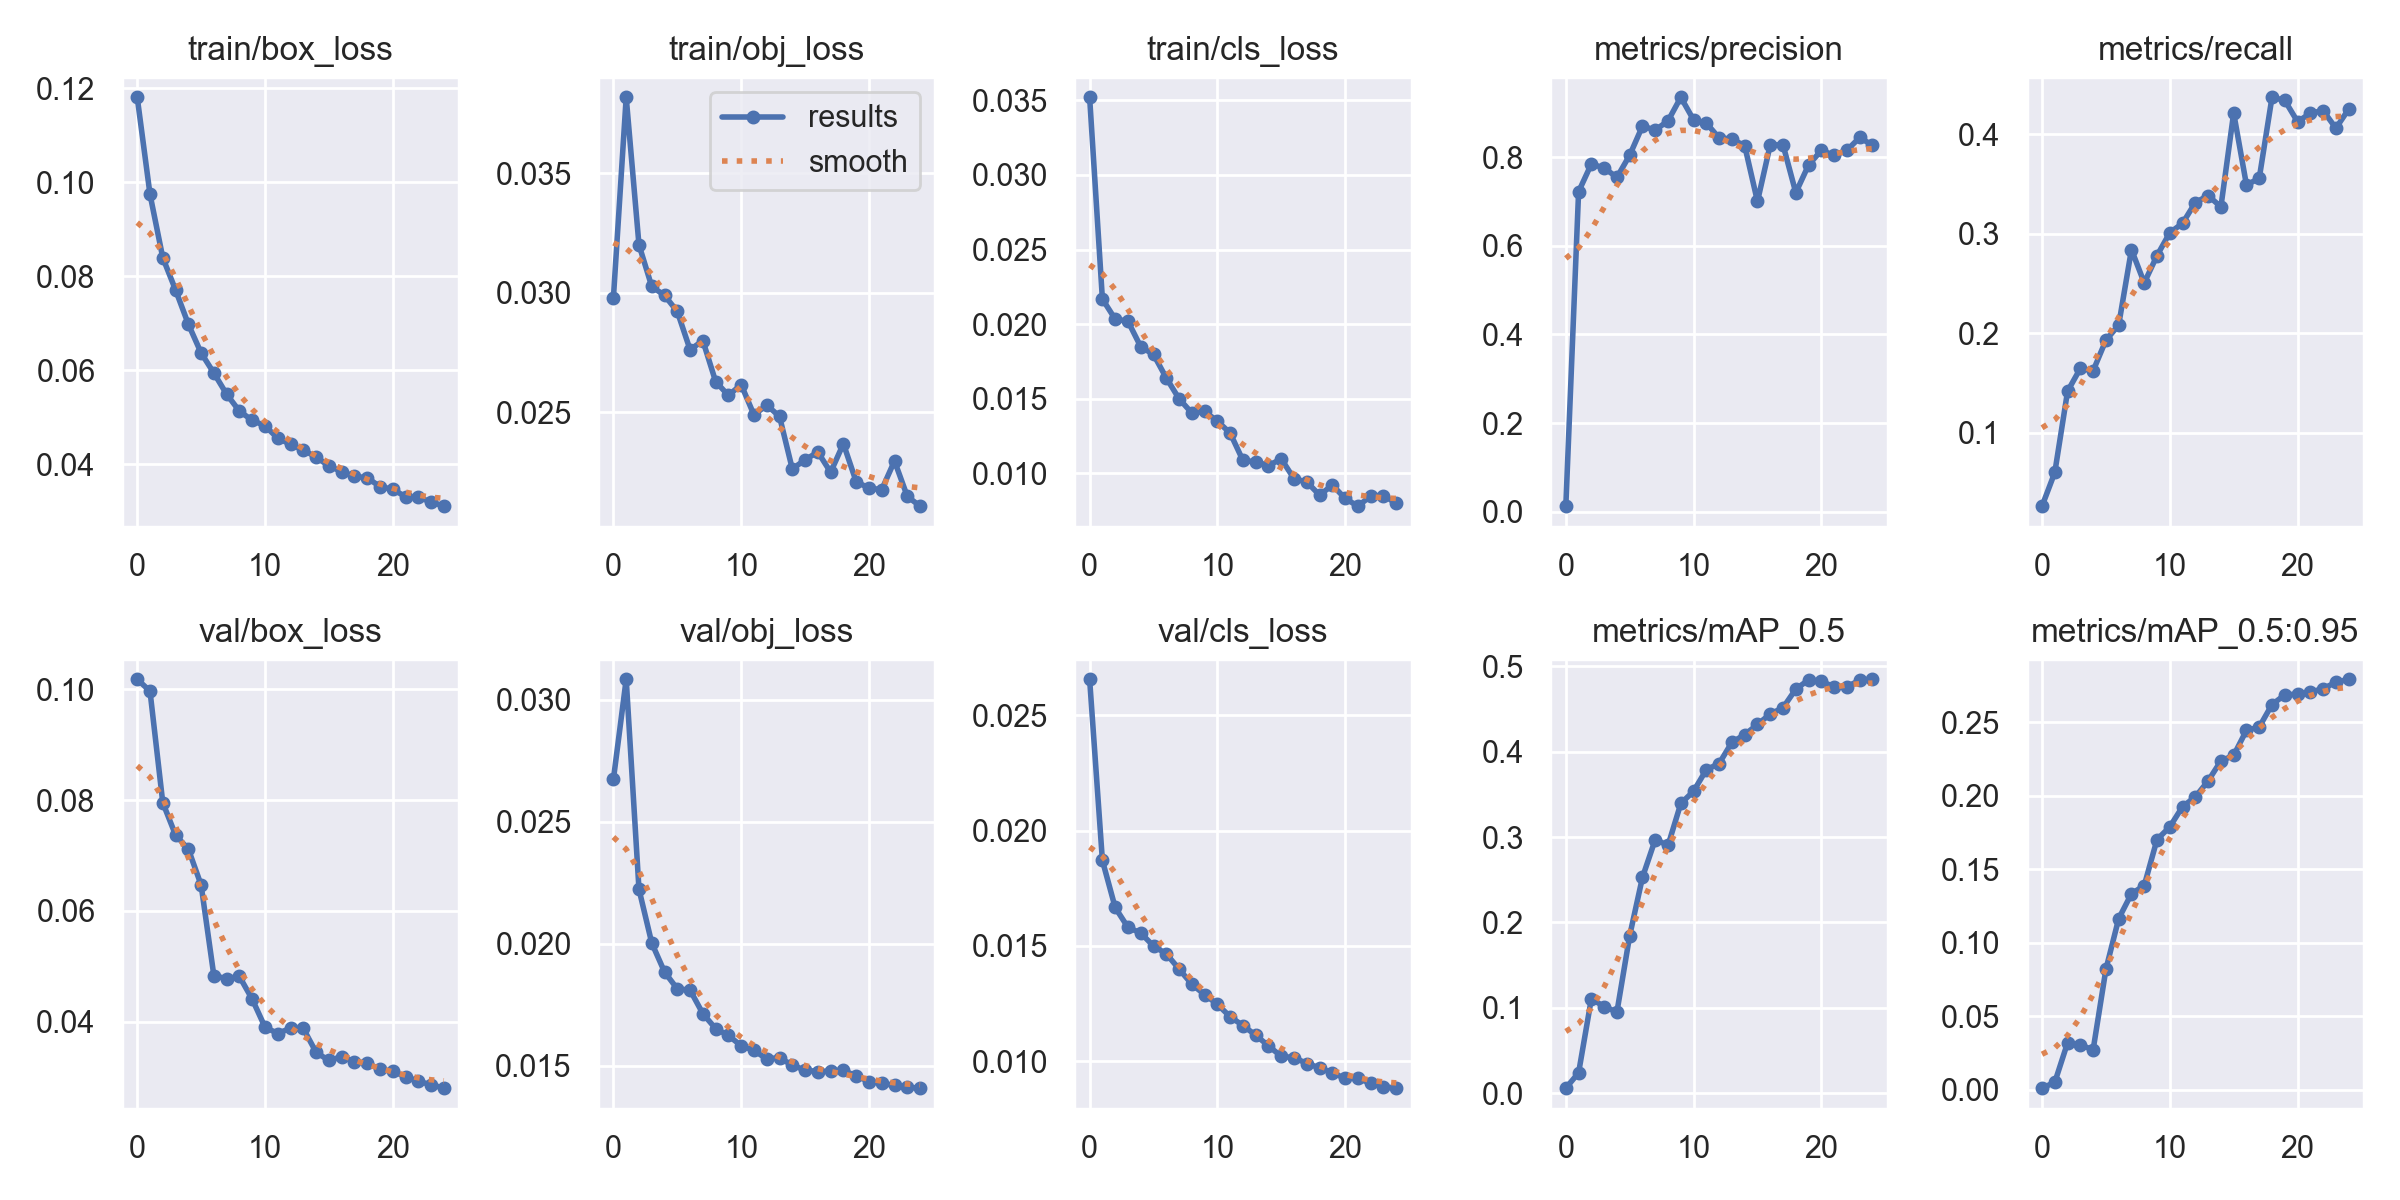

In [3]:
# 훈련 결과 시각화
from IPython.display import Image, display

# 결과 이미지 파일 경로 설정
results_dir = 'yolov5/runs/train/yolo_mask_detection'
results_img = os.path.join(results_dir, 'results.png')

# 이미지 파일이 존재하는지 확인하고, 존재하면 시각화
if os.path.exists(results_img):
    display(Image(filename=results_img, width=1000))
else:
    print(f"Error: {results_img} not found.")

<그래프 관찰>

- Box Loss (box_loss): 학습이 진행됨에 따라 점차 감소하는 경향을 보임. 이는 모델이 경계 상자(box)를 더 정확하게 예측하고 있다는 것을 의미.<br>

- Objectness Loss (obj_loss): 점차 감소하는 경향을 보임. 이는 모델이 객체를 식별하는 능력이 향상되고 있음을 의미.<br>

- Class Loss (cls_loss): 점차적으로 감소하고 있음. 이는 모델이 객체의 클래스를 더 정확하게 예측하고 있다는 것을 의미.<br>

- Precision (precision): 학습 초기에는 변동성이 있지만, 점차적으로 개선되고 있는 경향을 보임. 이는 모델이 예측한 객체 중 실제 객체의 비율이 높아지고 있음을 의미.<br>

- Recall (recall): 점차적으로 높아지고 있음. 이는 모델이 실제 객체를 더 잘 포착하고 있다는 의미.<br>

- Mean Average Precision (mAP): mAP@0.5에서는 후반부에 약간의 하락 경향이 보이지만, mAP@0.5:0.95에서는 지속적으로 향상되고 있음. 이는 모델이 다양한 임계값에서 일관된 성능을 보이고 있다는 것을 의미.<br>

2-3. 성능 평가 및 시각화

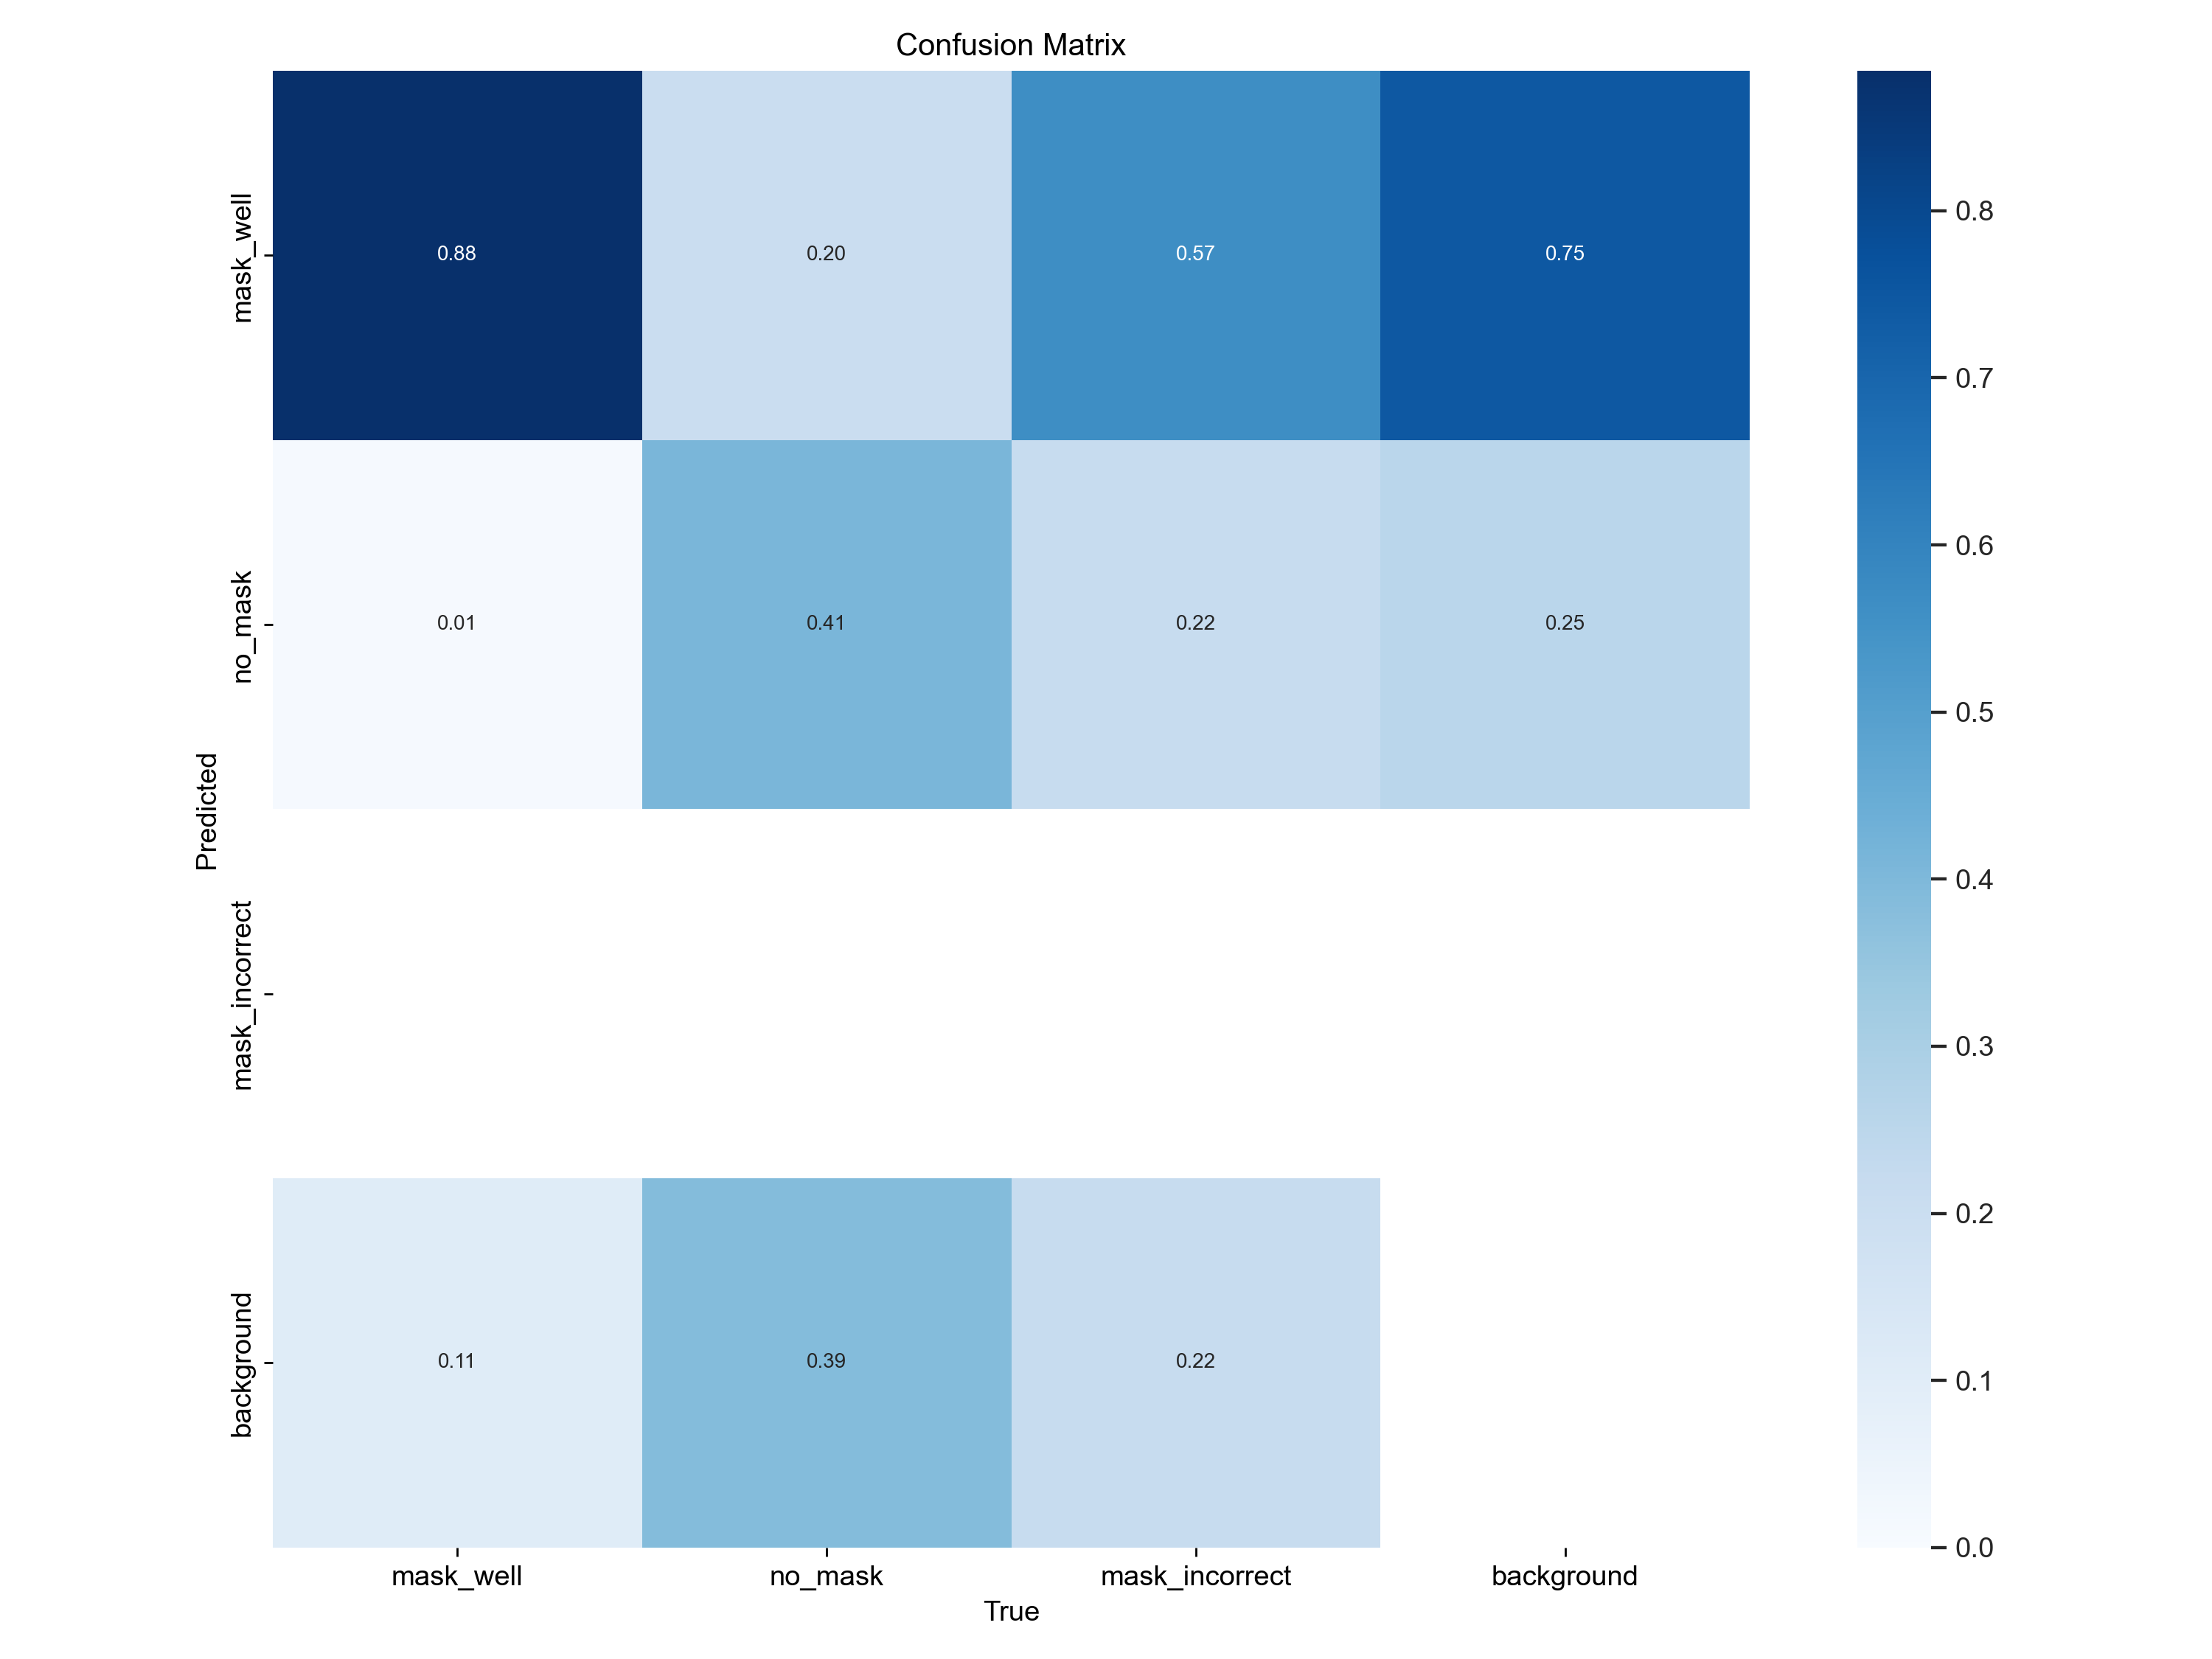

In [11]:
# YOLOv5 모델 성능 평가: 학습된 모델을 사용하여 검증 데이터셋에 대해 성능을 평가
!python yolov5/val.py --data data.yaml --weights yolov5/runs/train/yolo_mask_detection/weights/best.pt --img 320 --iou 0.65 --half

# 평가 결과 이미지 경로
val_results_img = 'yolov5/runs/val/exp/confusion_matrix.png'  # val.py 스크립트에서 생성된 이미지 경로

# 이미지가 존재하는지 확인하고, 존재하면 시각화
if os.path.exists(val_results_img):
    display(Image(filename=val_results_img, width=1000))
else:
    print(f"Error: {val_results_img} not found.")

<혼동행렬 관찰>

- mask_well 클래스는 상대적으로 잘 예측되고 있지만, 다른 클래스와의 혼동이 많음.

- no_mask 클래스는 예측 정확도가 낮아, 모델의 개선이 필요.

- mask_incorrect 클래스는 예측이 거의 되지 않거나, 데이터가 부족함.

- background 클래스는 예측이 잘 되지 않으며, 다른 클래스와 많이 혼동됨.

2-4. 객체 인식 및 시각화

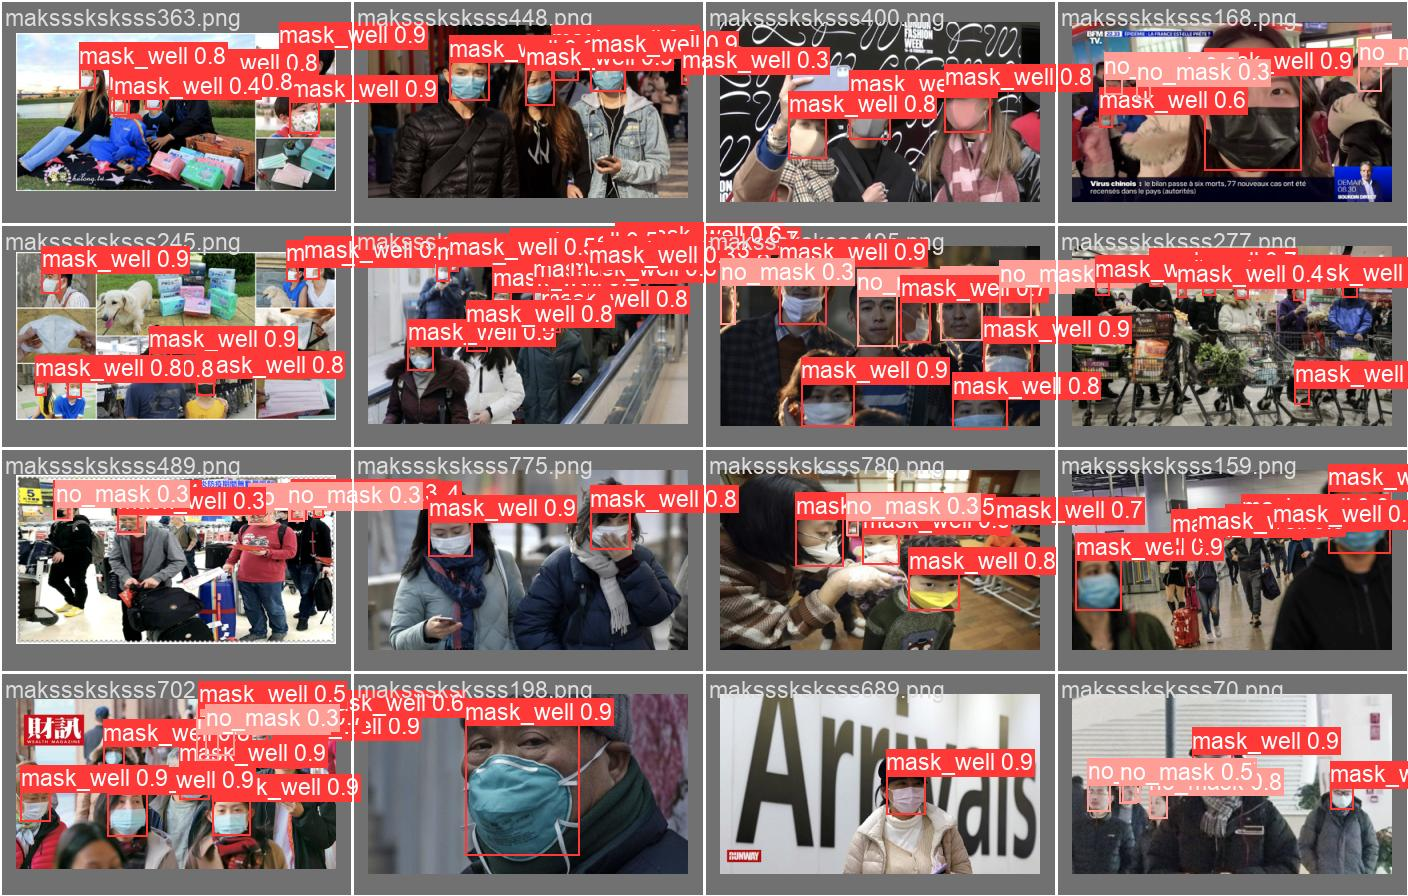

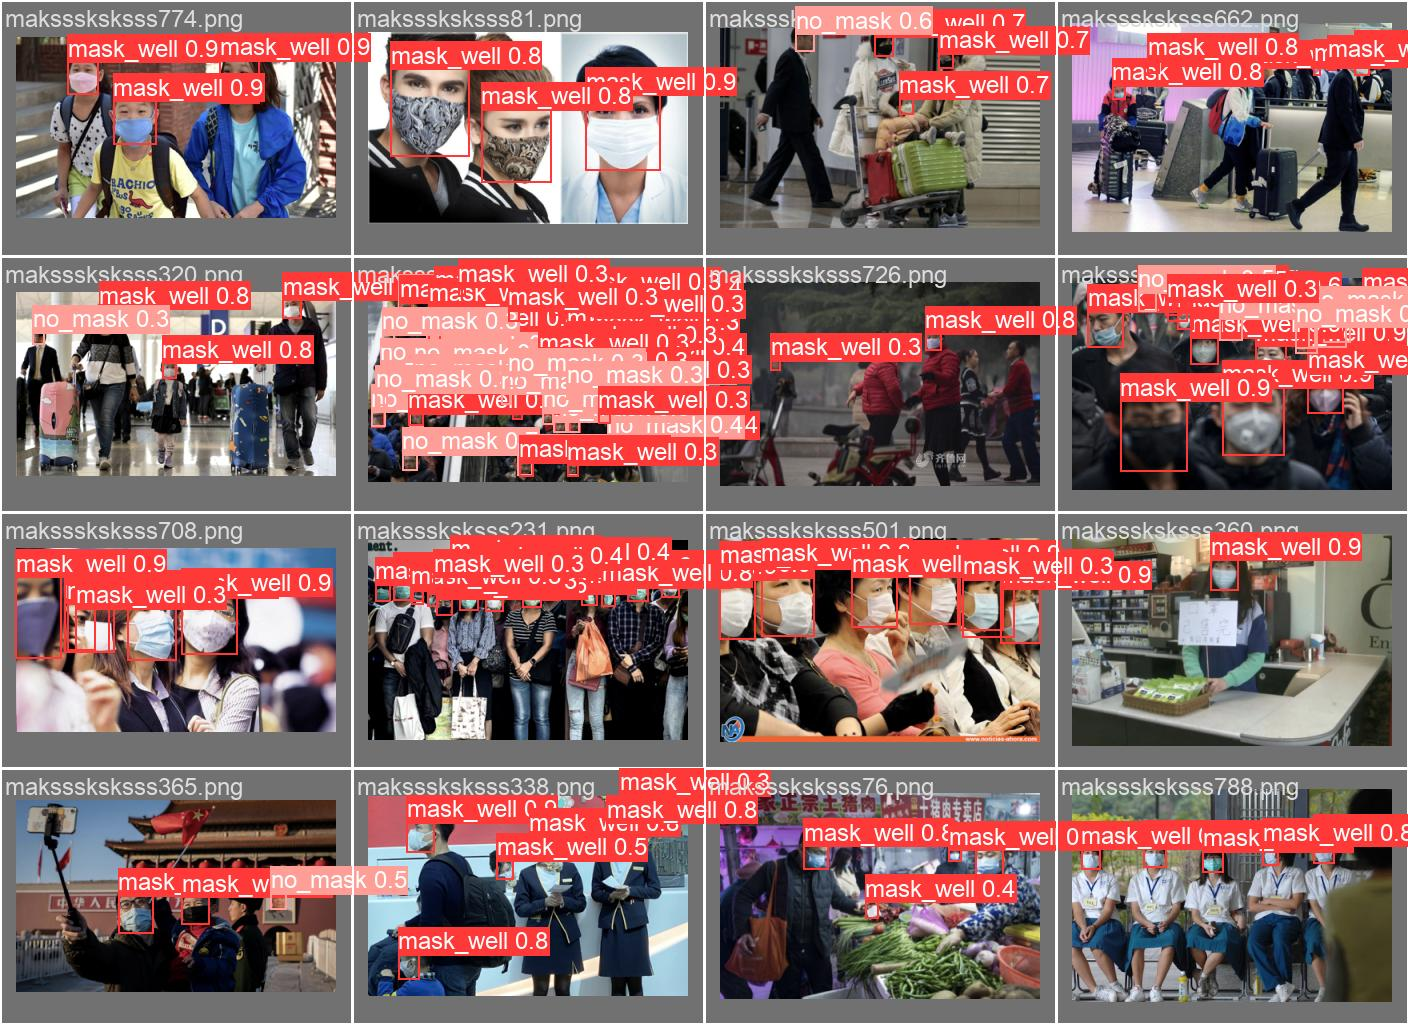

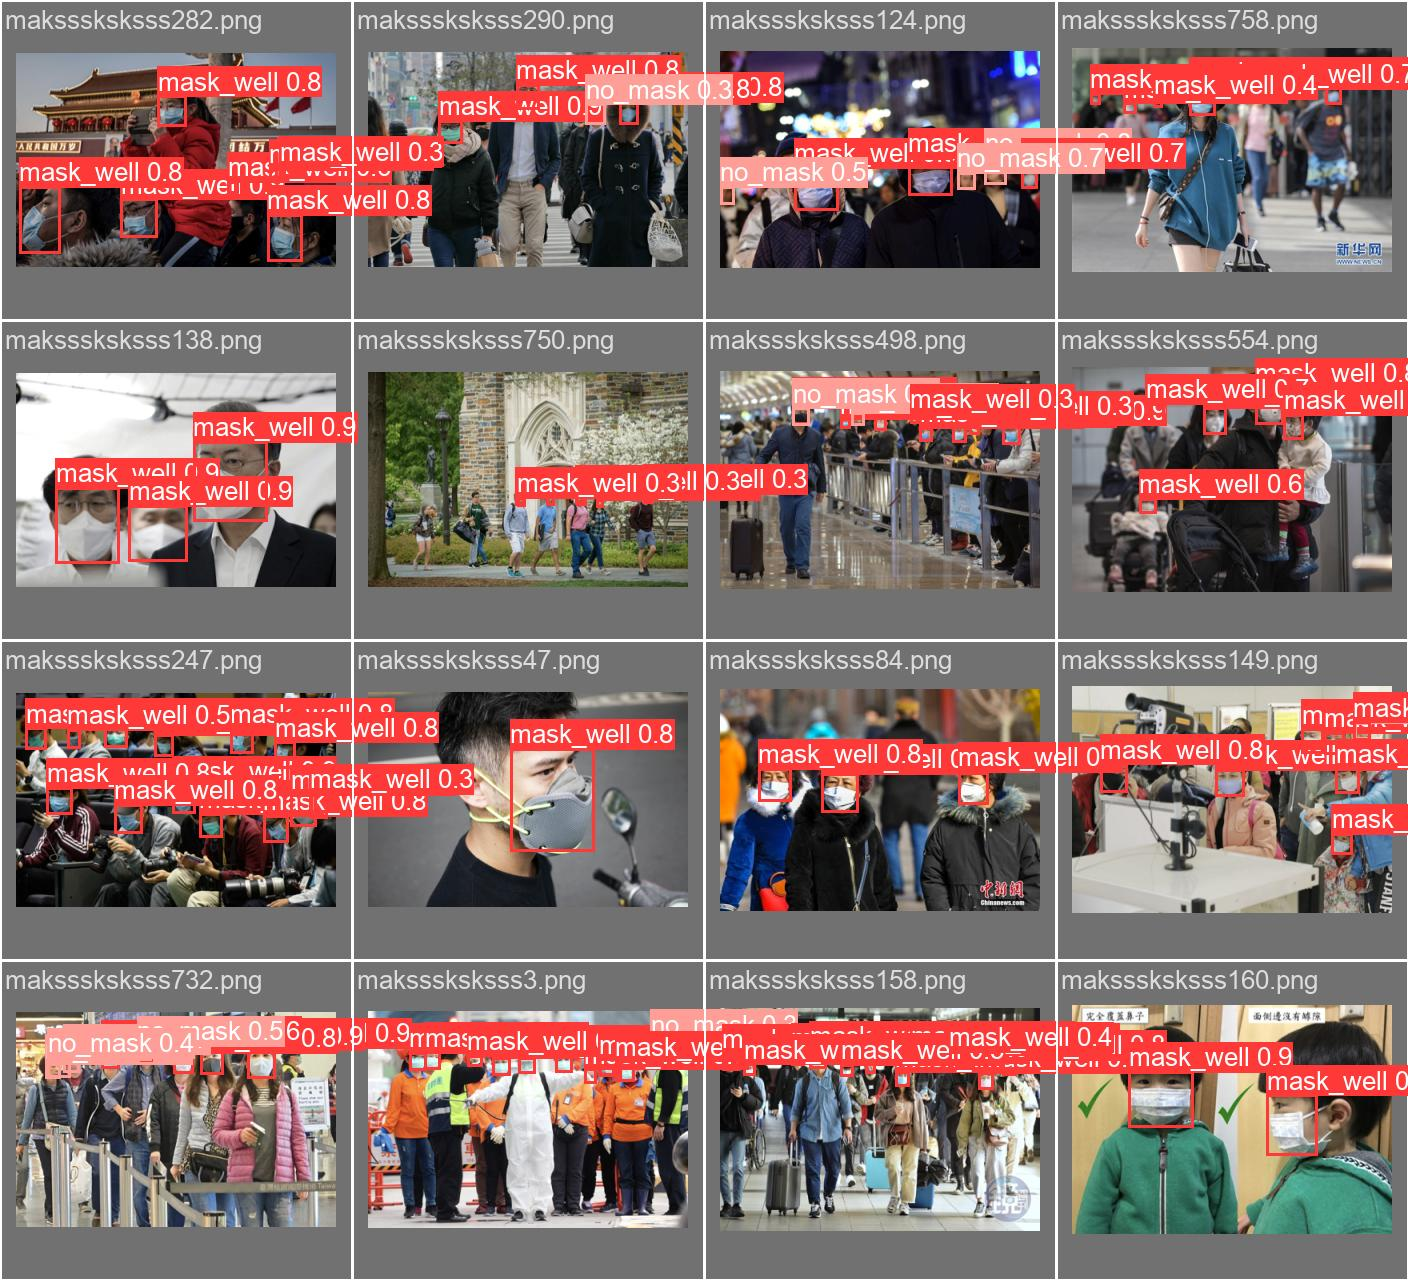

In [13]:
import glob

# 평가 결과 이미지 파일 경로 패턴
val_results_pattern = 'yolov5/runs/val/exp/val_batch*_pred.jpg'

# 평가 결과 이미지 파일 목록 가져오기
val_result_images = sorted(glob.glob(val_results_pattern))

# 이미지가 존재하는지 확인하고, 존재하면 최대 3개 시각화
if len(val_result_images) > 0:
    for val_result_image in val_result_images[:3]:
        display(Image(filename=val_result_image, width=600))
else:
    print(f"Error: No images found in {val_results_pattern}")

# 3. 하이퍼파라미터 튜닝 및 평가
3-1. YOLO 하이퍼파라미터 튜닝

In [23]:
# 하이퍼파라미터 설정
hyp_params = {
    'lr0': 0.01,  # 초기 학습률
    'lrf': 0.2,  # 최종 학습률 (더 낮춰봅니다)
    'momentum': 0.937,  # SGD momentum/Adam beta1
    'weight_decay': 0.0005,  # optimizer weight decay
    'warmup_epochs': 5.0,  # warmup epochs (더 길게)
    'warmup_momentum': 0.8,  # warmup initial momentum
    'warmup_bias_lr': 0.1,  # warmup initial bias lr
    'box': 0.05,  # box loss gain
    'cls': 0.7,  # cls loss gain (조금 더 높임)
    'cls_pw': 1.0,  # cls BCELoss positive_weight
    'obj': 1.2,  # obj loss gain (조금 더 높임)
    'obj_pw': 1.0,  # obj BCELoss positive_weight
    'iou_t': 0.25,  # IoU training threshold (조금 더 높임)
    'anchor_t': 4.0,  # anchor-multiple threshold
    'fl_gamma': 0.0,  # focal loss gamma
    'hsv_h': 0.015,  # image HSV-Hue augmentation
    'hsv_s': 0.7,  # image HSV-Saturation augmentation
    'hsv_v': 0.4,  # image HSV-Value augmentation
    'degrees': 0.0,  # image rotation
    'translate': 0.1,  # image translation
    'scale': 0.5,  # image scale
    'shear': 0.0,  # image shear
    'perspective': 0.0,  # image perspective
    'flipud': 0.0,  # image flip up-down
    'fliplr': 0.5,  # image flip left-right
    'mosaic': 1.0,  # image mosaic
    'mixup': 0.2,  # image mixup (조금 추가)
    'copy_paste': 0.0,  # segment copy-paste
}

# 하이퍼파라미터 파일 생성
hyp_file = 'hyp.yaml'
with open(hyp_file, 'w') as f:
    for k, v in hyp_params.items():
        f.write(f'{k}: {v}\n')

print(f"Hyperparameters written to {hyp_file}")

Hyperparameters written to hyp.yaml


In [26]:
# YOLOv5 모델 하이퍼파라미터 튜닝 후 훈련
!python yolov5/train.py --img 640 --batch 20 --epochs 50 --data data.yaml --weights yolov5/yolov5s.pt --name yolo_mask_detection_tuned --project yolov5/runs/train_tuned --cfg yolov5/models/yolov5s.yaml --hyp hyp.yaml --workers 4

In [2]:
# YOLOv5 모델 하이퍼파라미터 튜닝 후 훈련 재개
!python yolov5/train.py --img 640 --batch 20 --epochs 50 --data data.yaml --weights yolov5/runs/train_tuned/yolo_mask_detection_tuned/weights/last.pt --name yolo_mask_detection_tuned --project yolov5/runs/train_tuned --cfg yolov5/models/yolov5s.yaml --hyp hyp.yaml --workers 4 --resume

train: weights=yolov5/runs/train_tuned/yolo_mask_detection_tuned/weights/last.pt, cfg=yolov5/models/yolov5s.yaml, data=data.yaml, hyp=hyp.yaml, epochs=50, batch_size=20, imgsz=640, rect=False, resume=True, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=4, project=yolov5/runs/train_tuned, name=yolo_mask_detection_tuned, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 3 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-321-g3742ab49 Python-3.9.1 torch-2.3.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.2, mome

3-2. 하이퍼파라미터 튜닝 모델 평가 결과 저장

In [4]:
# 하이퍼파라미터 튜닝 모델 평가 결과 저장
!python yolov5/val.py --data data.yaml --weights yolov5/runs/train_tuned/yolo_mask_detection_tuned/weights/best.pt --img 640 --iou 0.65 --half --project yolov5/runs/val_tuned --name yolo_mask_detection_tuned

val: data=data.yaml, weights=['yolov5/runs/train_tuned/yolo_mask_detection_tuned/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val_tuned, name=yolo_mask_detection_tuned, exist_ok=False, half=True, dnn=False
YOLOv5  v7.0-321-g3742ab49 Python-3.9.1 torch-2.3.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning C:\Users\박경민\Desktop\인공지능기초\과제\기말고사\data\val\labels.cache... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]
val: Scanning C:\Users\박경민\Desktop\인공지능기초\과제\기말고사\data\val\labels.cache... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/5 [00:00

3-3. 하이퍼파라미터 튜닝 모델 훈련 결과 시각화

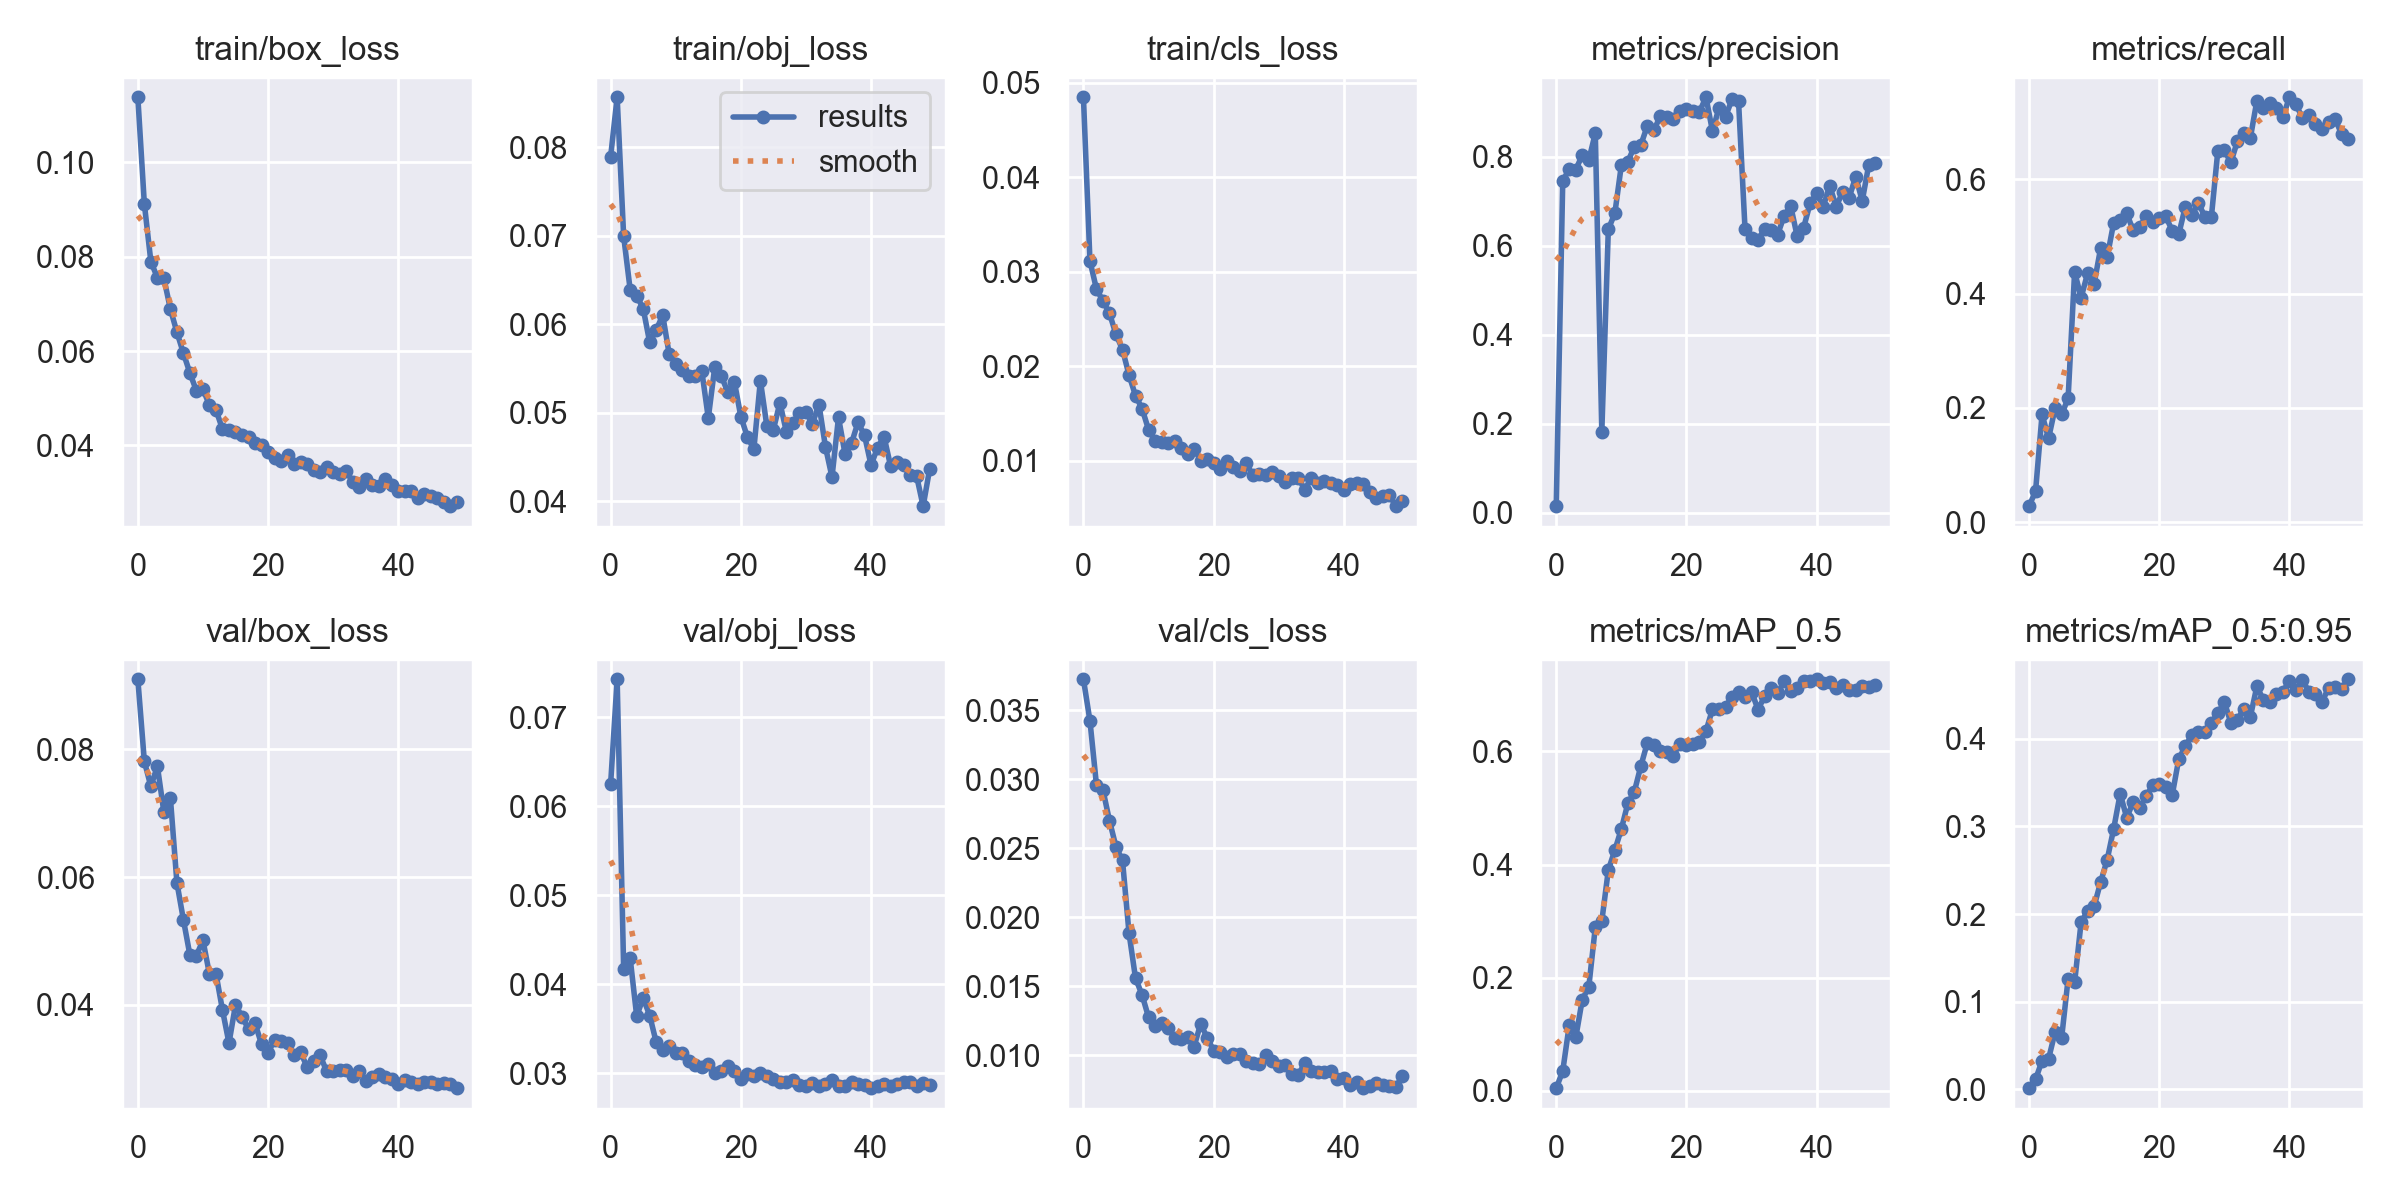

In [10]:
# 결과 이미지 파일 경로 설정
results_dir = 'yolov5/runs/train_tuned/yolo_mask_detection_tuned'
results_img = os.path.join(results_dir, 'results.png')

# 이미지 파일이 존재하는지 확인하고, 존재하면 시각화
if os.path.exists(results_img):
    display(Image(filename=results_img, width=1000))
else:
    print(f"Error: {results_img} not found.")

<하이퍼파라미터 튜닝 전후 그래프 비교 관찰>

- Box Loss (box_loss)
    - 초반 그래프: 초기 값이 약 0.12에서 점차 감소하여 약 0.03 근처로 수렴.
    - 튜닝 후 그래프: 초기 값이 약 0.11에서 점차 감소하여 약 0.02 근처로 수렴.
    - 즉, 튜닝 후 초기 손실값이 낮고 더 빠르게 감소하였음.

- Objectness Loss (obj_loss)
    - 초반 그래프: 초기 값 약 0.035에서 점차 감소하여 약 0.02 근처로 수렴.
    - 튜닝 후 그래프: 초기 값이 약 0.08에서 점차 감소하여 약 0.02 근처로 수렴.
    - 즉, 튜닝 후 초기 손실 값이 더 높지만, 감소하는 경향을 유사함.

- Class Loss (cls_loss)
    - 초반 그래프: 초기 값 약 0.035에서 점차 감소하여 약 0.01 근처로 수렴.
    - 튜닝 후 그래프: 초기 값 약 0.05에서 점차 감소하여 약 0.01 근처로 수렴.
    - 즉, 튜닝 후 초기 손실 값이 더 높지만, 감소하는 경향은 유사함.

- Precision (precision)
    - 초반 그래프: 초기 값 약 0.0에서 급격히 상승하여 약 0.7 근처로 수렴.
    - 튜닝 후 그래프: 초기 값 약 0.0에서 급격히 상승하여 약 0.82 근처로 수렴.
    - 즉, 튜닝 후 최종 정밀도가 더 높음.

- Recall (recall)
    - 초반 그래프: 초기 값 약 0.0에서 점차 상승하여 약 0.4 근처로 수렴.
    - 튜닝 후 그래프: 초기 값 약 0.0에서 점차 상승하여 약 0.7 근처로 수렴.
    - 즉, 튜닝 후 최종 재현율이 더 높음.

- Mean Average Precision (mAP)
    - 초반 그래프: mAP_0.5는 0.0에서 0.5 근처로 수렴. mAP_0.5:0.95는 0.0에서 0.25 근처로 수렴.
    - 튜닝 후 그래프: mAP_0.5는 0.0에서 0.7 근처로 수렴. mAP_0.5:0.95 0.0에서 0.45 근처로 수렴.
    - 즉, 튜닝 후 최종 mAP_0.5와 mAP_0.5:0.95 모두 더 높음.

3-4. 하이퍼파라미터 튜닝 모델 성능 평가 및 시각화

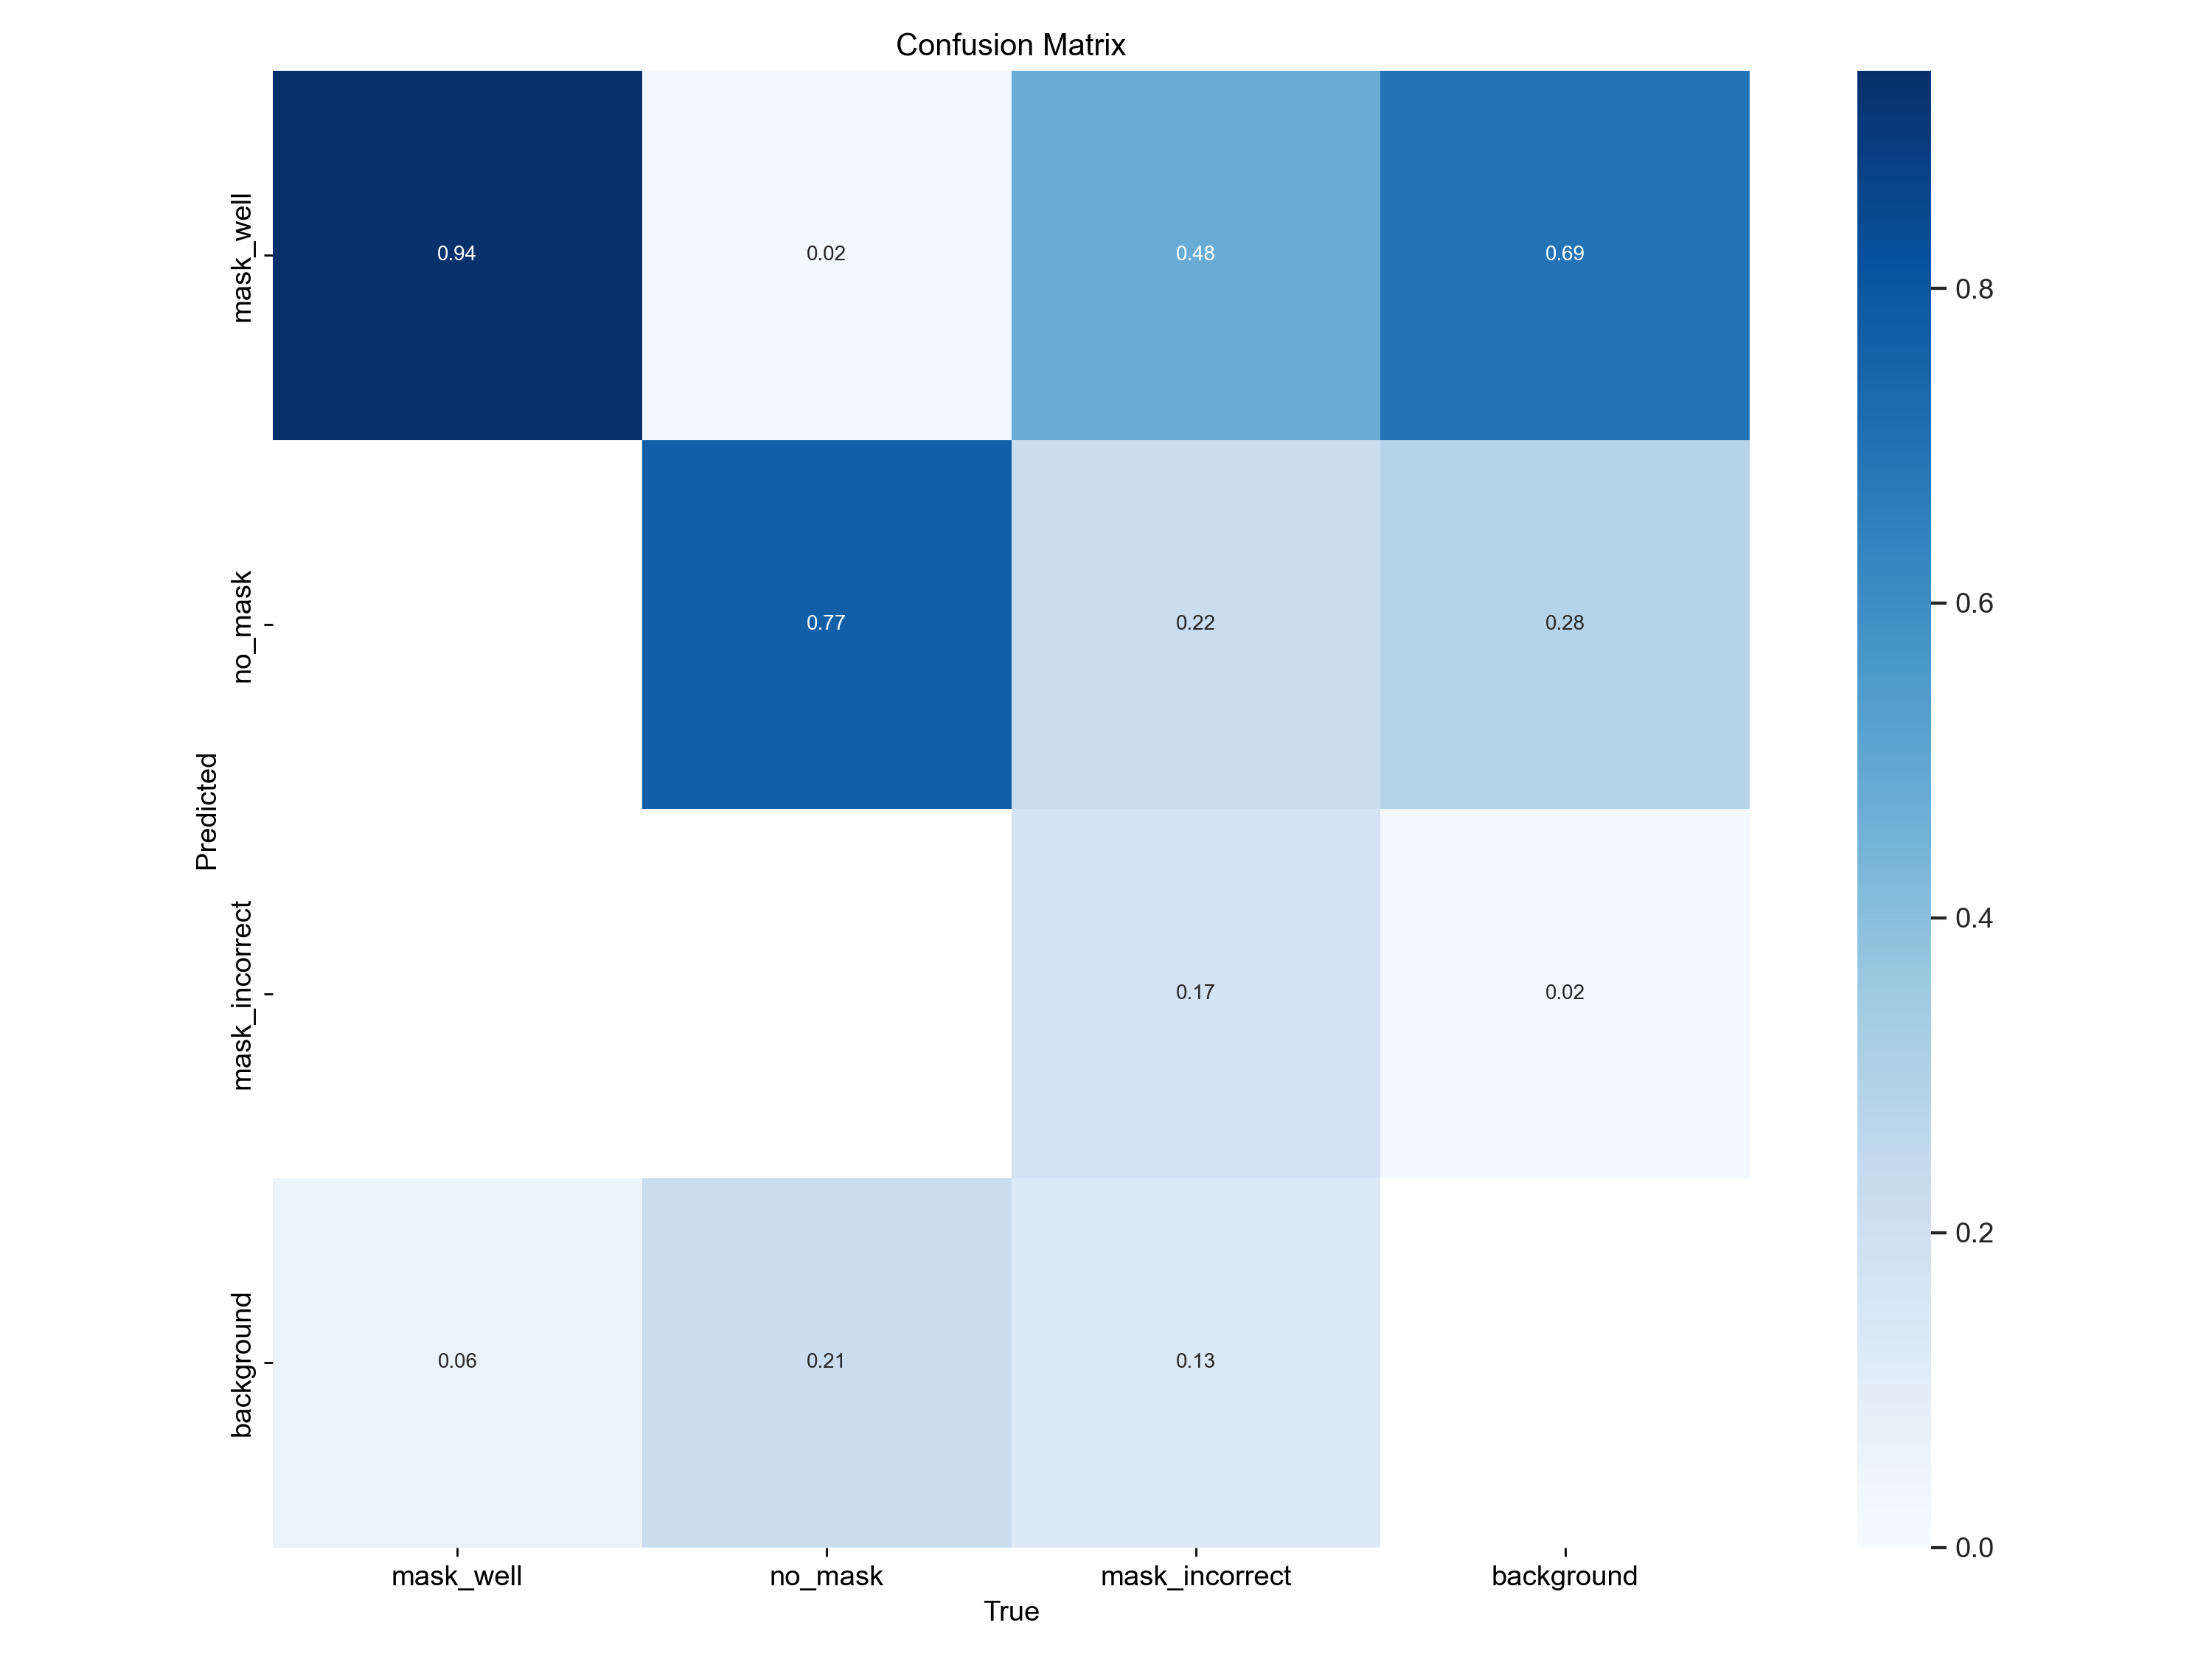

In [13]:
# YOLOv5 모델 성능 평가: 학습된 모델을 사용하여 검증 데이터셋에 대해 성능을 평가
!python yolov5/val.py --data data.yaml --weights yolov5/runs/train/yolo_mask_detection/weights/best.pt --img 320 --iou 0.65 --half

# 평가 결과 이미지 경로
val_results_img = 'yolov5/runs/val_tuned/yolo_mask_detection_tuned/confusion_matrix.png'  # val.py 스크립트에서 생성된 이미지 경로

# 이미지가 존재하는지 확인하고, 존재하면 시각화
if os.path.exists(val_results_img):
    display(Image(filename=val_results_img, width=1000))
else:
    print(f"Error: {val_results_img} not found.")

<하이퍼파라미터 튜닝 전후 혼동행렬 비교 관찰>

(TP: True Positive, FN: False Negative, FP: False Positive)
- mask_well
    - TP: 0.88 → 0.94 (향상)
    - FN: 0.01 → 0.02 (약간 증가)
    - FP: 0.11 → 0.06 (감소)
    - 즉, True Positive가 향상되었고, False Positive가 감소하여 모델이 mask_well 클래스를 더 잘 예측하고 있음.

- no_mask
    - TP: 0.41 → 0.77 (향상)
    - FN: 0.20 → 0.22 (약간 증가)
    - FP: 0.39 → 0.23 (감소)
    - 즉, True Positive가 크게 향상되었고, False Positive가 감소하여 모델이 no_mask 클래스를 더 잘 예측하고 있음.

- mask_incorrect
    - TP: 0.22 → 0.17 (감소)
    - FN: 0.22 → 0.02 (감소)
    - FP: 0.56 → 0.81 (증가)
    - 즉, True Positive가 감소했으며, False Positive가 크게 증가하여 모델이 mask_incorrect 클래스를 잘못 예측하고 있음. 이 클래스의 성능이 저하됨.

- background
    - TP: 0.25 → 0.13 (감소)
    - FN: 0.75 → 0.87 (증가)
    - FP: 0.75 → 0.87 (증가)
    - 즉, True Positive가 감소했으며, False Positive와 False Negative가 증가하여 모델이 background 클래스를 잘못 예측하고 있음. 이 클래스의 성능이 저하됨.

3-5. 하이퍼파라미터 튜닝 모델 객체 인식 및 시각화

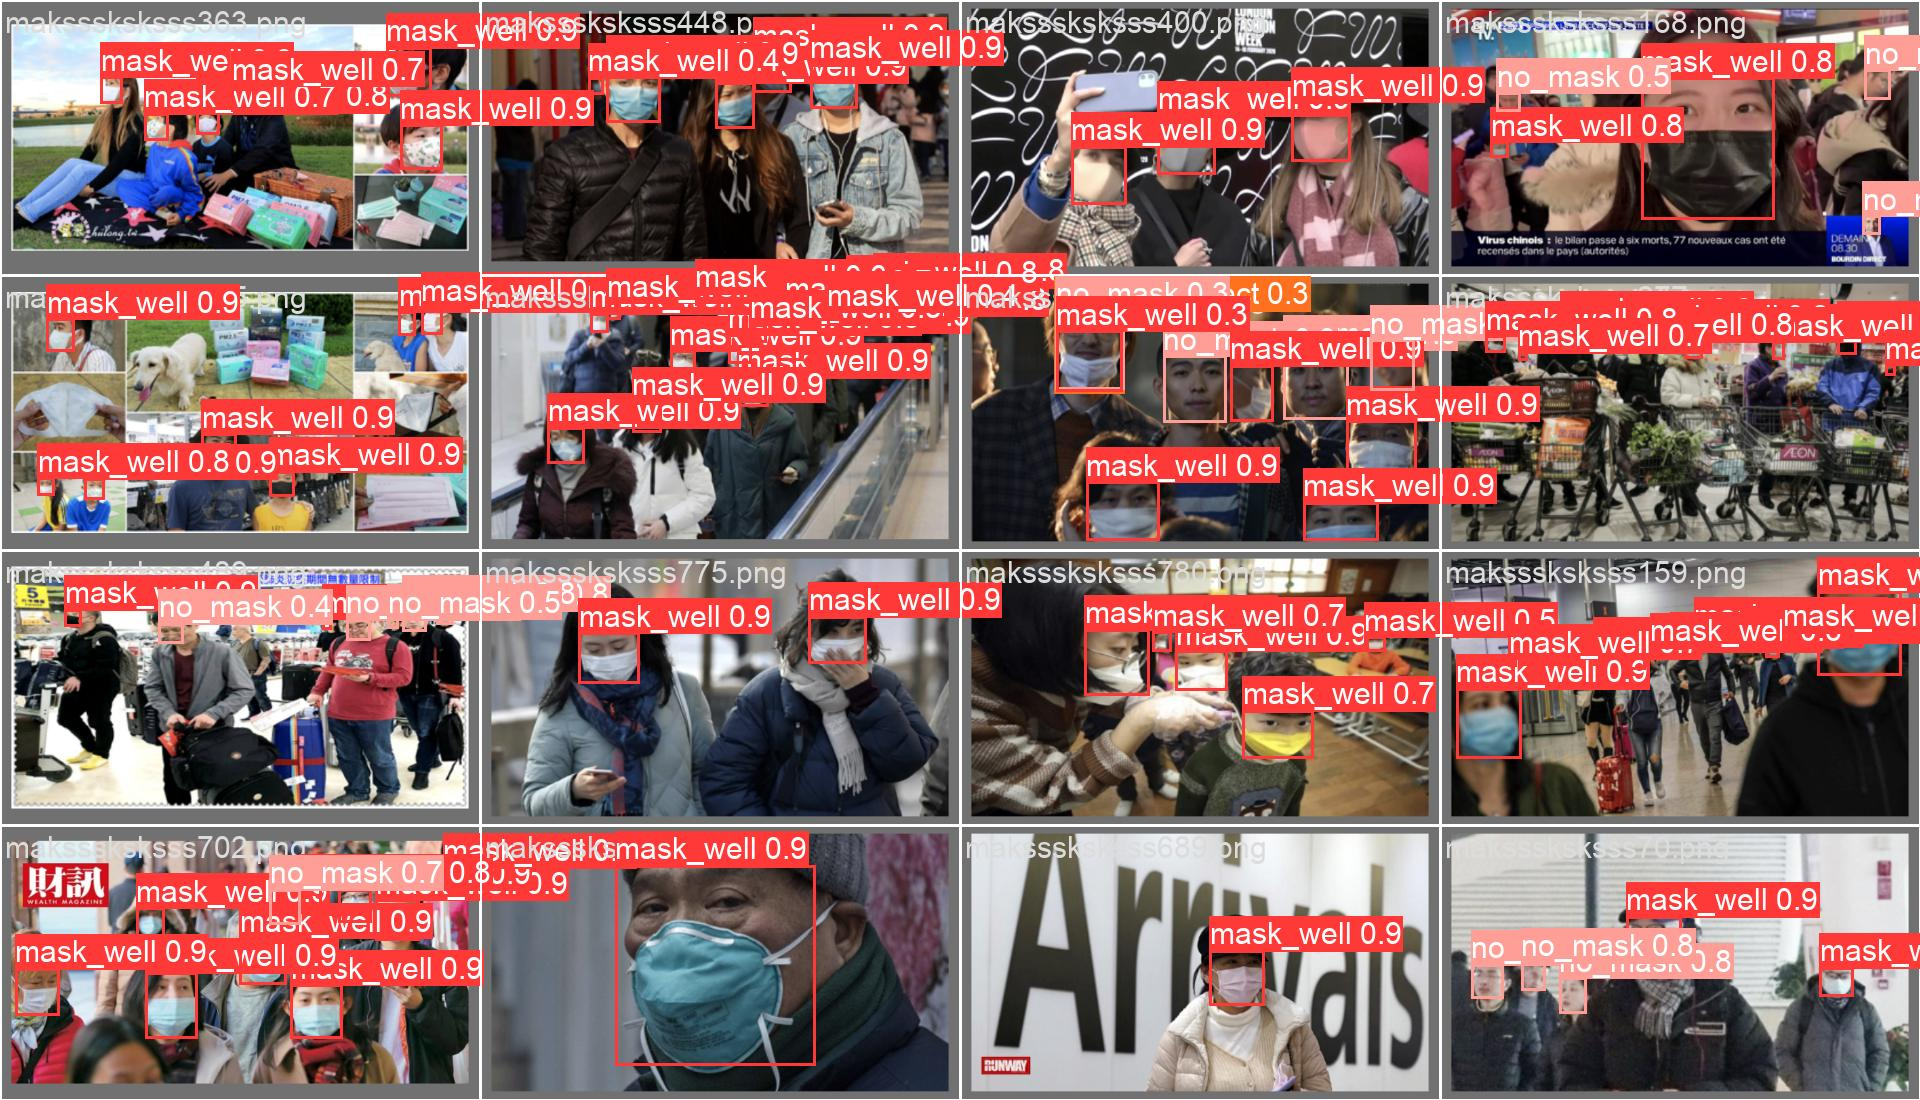

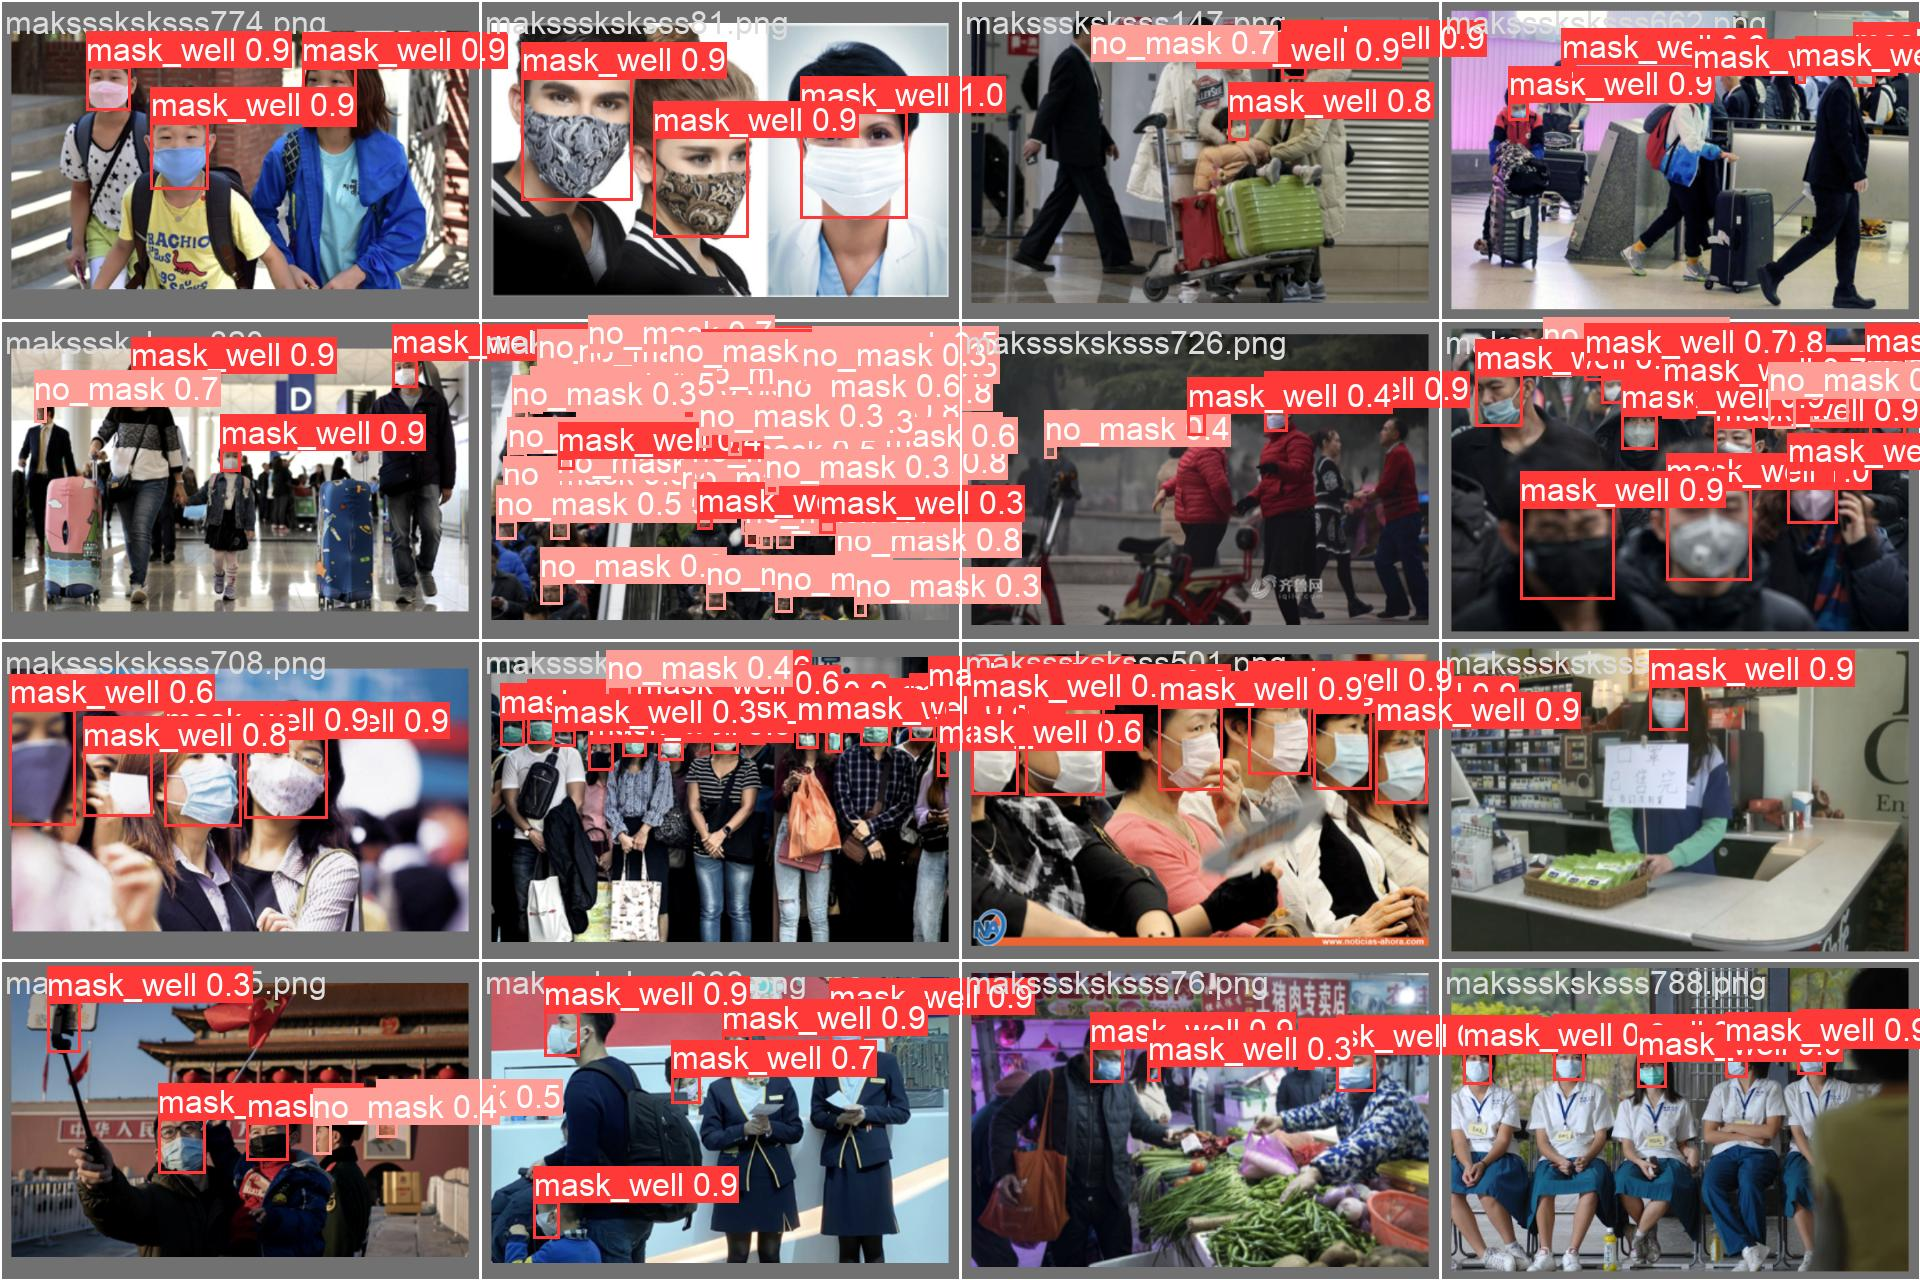

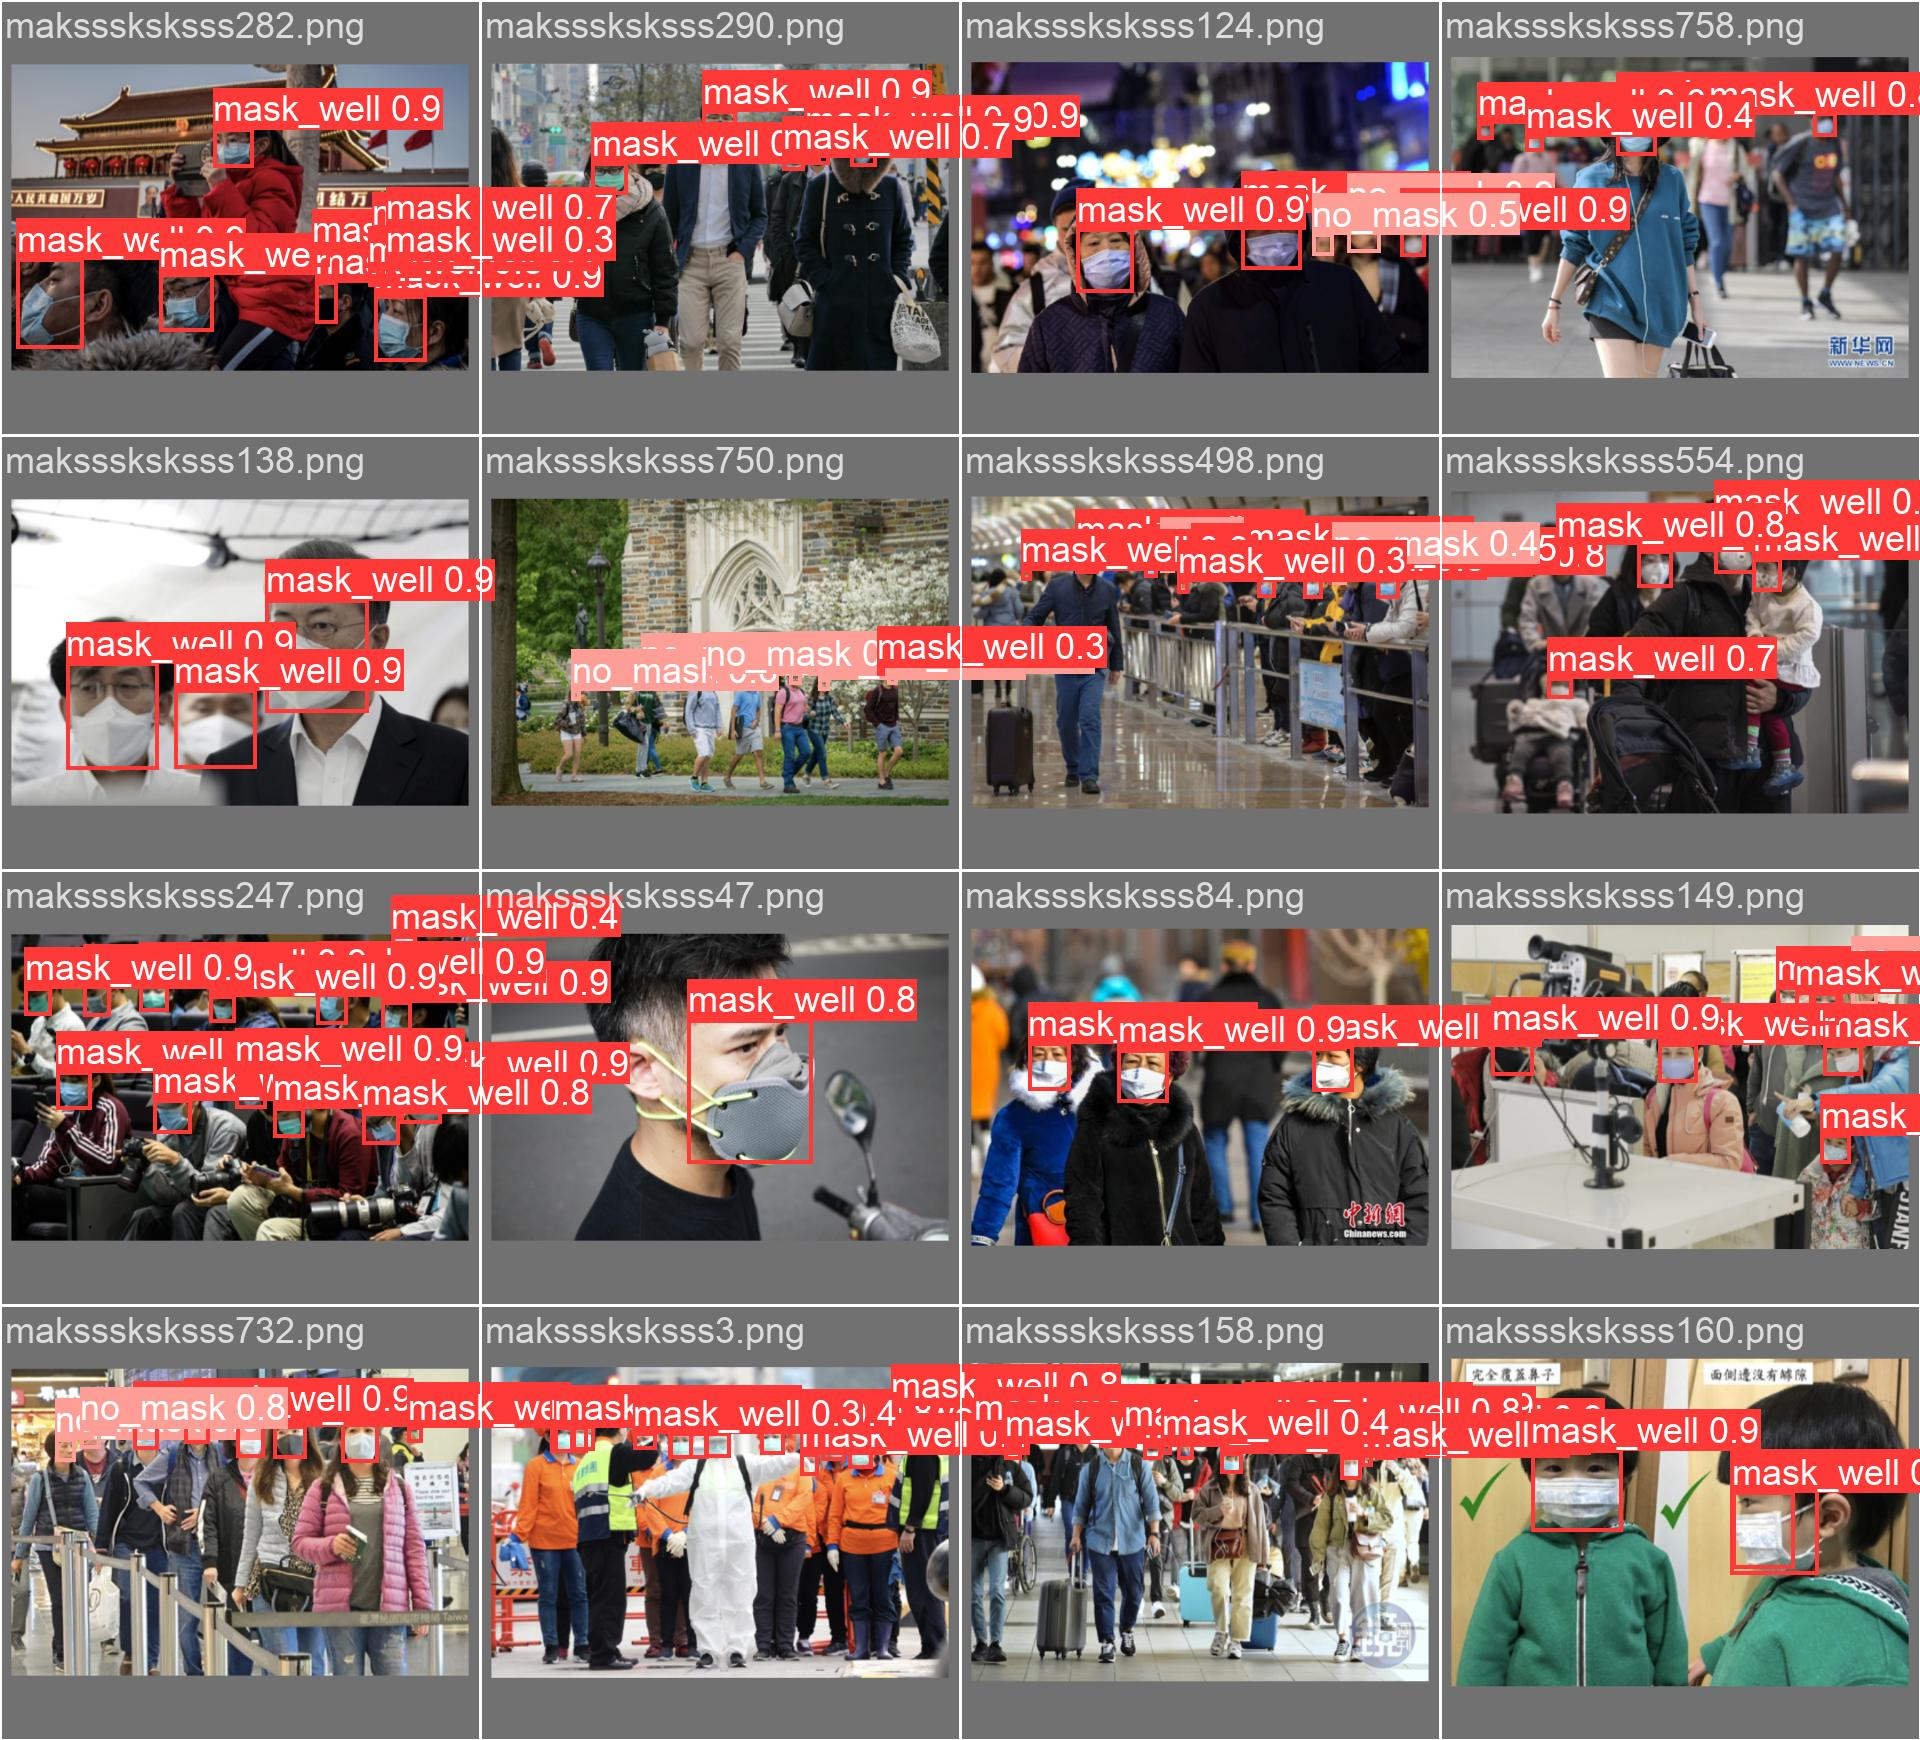

In [4]:
# 평가 결과 이미지 파일 경로 패턴
val_results_pattern = 'yolov5/runs/val_tuned/yolo_mask_detection_tuned/val_batch*_pred.jpg'

# 평가 결과 이미지 파일 목록 가져오기
val_result_images = sorted(glob.glob(val_results_pattern))

# 이미지가 존재하는지 확인하고, 존재하면 최대 3개 시각화
if len(val_result_images) > 0:
    for val_result_image in val_result_images[:3]:
        display(Image(filename=val_result_image, width=600))
else:
    print(f"Error: No images found in {val_results_pattern}")

# 4. 최종 모델 학습 및 분석
4-1. 최종 모델 학습

In [1]:
# 최종 모델 학습
!python yolov5/train.py --img 640 --batch 20 --epochs 50 --data data.yaml --weights yolov5/yolov5s.pt --name yolo_mask_detection_final --project yolov5/runs/train_final --cfg yolov5/models/yolov5s.yaml --hyp hyp.yaml --workers 4

train: weights=yolov5/yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=data.yaml, hyp=hyp.yaml, epochs=50, batch_size=20, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=4, project=yolov5/runs/train_final, name=yolo_mask_detection_final, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 5 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-321-g3742ab49 Python-3.9.1 torch-2.3.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=

In [18]:
# 최종 모델 학습 재개
!python yolov5/train.py --img 640 --batch 20 --epochs 50 --data data.yaml --weights yolov5/runs/train_final/yolo_mask_detection_final/weights/last.pt --name yolo_mask_detection_final --project yolov5/runs/train_final --cfg yolov5/models/yolov5s.yaml --hyp hyp.yaml --workers 4 --resume

4-2. 최종 모델 테스트 데이터셋 평가

In [7]:
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# 테스트 데이터셋 디렉토리 설정
test_data_dir = 'data/test/images'

# 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train_final/yolo_mask_detection_final/weights/best.pt')

# 테스트 이미지 파일 목록 가져오기
test_images = [os.path.join(test_data_dir, img) for img in os.listdir(test_data_dir) if img.endswith('.png')]

# 결과 저장 디렉토리 설정
result_dir = 'yolov5/runs/test_results/exp'
os.makedirs(result_dir, exist_ok=True)

# 실제 라벨과 예측 라벨 리스트 초기화
y_true = []
y_pred = []

# 유효한 클래스 목록
valid_classes = {'0', '1', '2'}
class_names = ['mask_well', 'no_mask', 'mask_incorrect']

# 예측 및 결과 저장
for img_path in test_images:
    # 예측 수행
    results = model(img_path, size=640)
    
    # 실제 라벨 추출
    label_file = os.path.join('data/test/labels', os.path.splitext(os.path.basename(img_path))[0] + '.txt')
    true_labels = []
    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            true_labels = [line.split()[0] for line in f.readlines() if line.split()[0] in valid_classes]
    
    # 예측 라벨 추출
    pred_labels = [str(pred['class']) for pred in results.pandas().xyxy[0].to_dict('records') if str(pred['class']) in valid_classes]
    
    # 두 리스트의 길이를 맞추기 위해 잘못된 예측을 제거
    min_len = min(len(true_labels), len(pred_labels))
    true_labels = true_labels[:min_len]
    pred_labels = pred_labels[:min_len]
    
    # 리스트에 추가
    y_true.extend(true_labels)
    y_pred.extend(pred_labels)

    # 예측 결과 시각화 및 저장
    img = Image.open(img_path)
    plt.imshow(img)
    results.render()  # Bounding box와 라벨 추가
    plt.show()
    results.save(save_dir=result_dir)

# 실제 라벨과 예측 라벨의 길이 일치 여부 확인
print(f"Length of y_true: {len(y_true)}")
print(f"Length of y_pred: {len(y_pred)}")

# 성능 지표 계산 및 출력
if y_true and y_pred:
    print(classification_report(y_true, y_pred, target_names=class_names))
    print(confusion_matrix(y_true, y_pred))
else:
    print("No labels to evaluate.")

Using cache found in C:\Users\박경민/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-20 Python-3.9.1 torch-2.3.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Saved 1 image to yolov5\runs\test_results\exp2
Saved 1 image to yolov5\runs\test_results\exp3
Saved 1 image to yolov5\runs\test_results\exp4
Saved 1 image to yolov5\runs\test_results\exp5
Saved 1 image to yolov5\runs\test_results\exp6
Saved 1 image to yolov5\runs\test_results\exp7
Saved 1 image to yolov5\runs\test_results\exp8
Saved 1 image to yolov5\runs\test_results\exp9
Saved 1 image to yolov5\runs\test_results\exp10
Saved 1 image to yolov5\runs\test_results\exp11
Saved 1 image to yolov5\runs\test_results\exp12
Saved 1 image to yolov5\runs\test_results\exp13
Saved 1 image to yolov5\runs\test_results\exp14
Saved 1 image to yolov5\runs\test_results\exp15
Saved 1 image to yolov5\runs\test_results\exp16
Saved 1 image to yolov5\runs\test_results\exp1

Length of y_true: 634
Length of y_pred: 634
                precision    recall  f1-score   support

     mask_well       0.86      0.89      0.87       478
       no_mask       0.55      0.58      0.57       131
mask_incorrect       0.00      0.00      0.00        25

      accuracy                           0.79       634
     macro avg       0.47      0.49      0.48       634
  weighted avg       0.76      0.79      0.77       634

[[425  53   0]
 [ 55  76   0]
 [ 17   8   0]]


4-3. 최종 모델 성능 평가 및 시각화

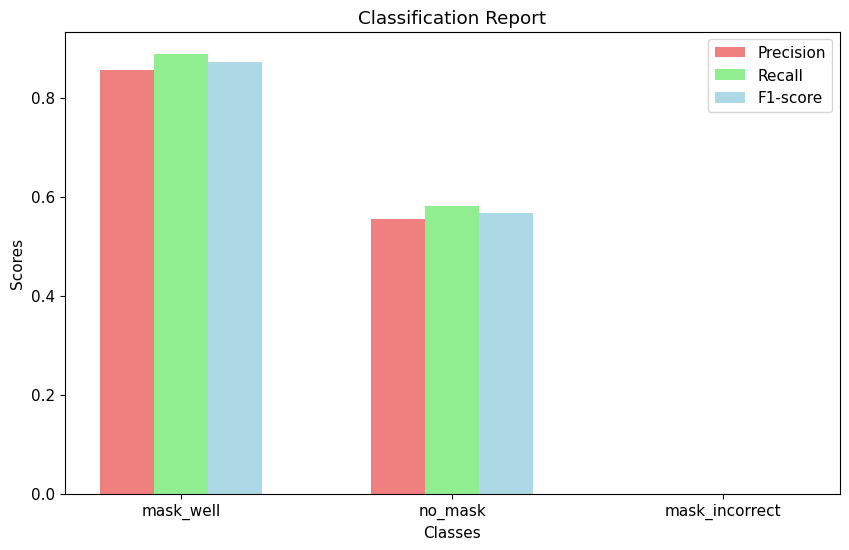

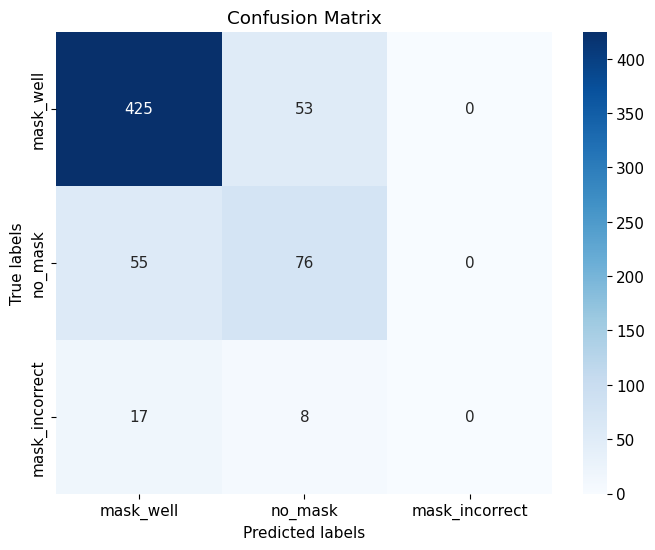

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 성능 지표 데이터
report = classification_report(y_true, y_pred, target_names=['mask_well', 'no_mask', 'mask_incorrect'], output_dict=True)

# precision, recall, f1-score 데이터 추출
metrics = ['precision', 'recall', 'f1-score']
metric_values = {metric: [report[class_name][metric] for class_name in ['mask_well', 'no_mask', 'mask_incorrect']] for metric in metrics}

# 바 차트 시각화
x = np.arange(len(['mask_well', 'no_mask', 'mask_incorrect']))  # 라벨의 위치
width = 0.2  # 바의 폭

fig, ax = plt.subplots(figsize=(10, 6))

# 각각의 성능 지표에 대한 바 차트
colors = ['lightcoral', 'lightgreen', 'lightblue']
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, metric_values[metric], width, label=metric.capitalize(), color=colors[i])

# x축 라벨 설정
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report')
ax.set_xticks(x + width)
ax.set_xticklabels(['mask_well', 'no_mask', 'mask_incorrect'])
ax.legend()

# 그래프 표시
plt.show()

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['mask_well', 'no_mask', 'mask_incorrect'], yticklabels=['mask_well', 'no_mask', 'mask_incorrect'])

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# 그래프 표시
plt.show()

<최종 평가 분석>

1. 정확도 및 정밀도
- mask_well 클래스: 높은 정밀도와 재현율을 보임
- no_mask 클래스: 상대적으로 낮은 정밀도와 재현율을 보임
- mask_incorrect 클래스: 예측이 전혀 되고 있지 않음

2. 혼동 행렬
- mask_well 클래스는 대부분 올바르게 예측되고 있지만 no_mask 클래스와 혼동이 있는 경우가 있음
- no_mask 클래스는 혼동이 비교적 많음
- mask_incorrect 클래스는 제대로 예측되지 않음